In [1]:
import pathlib  
import numpy as np  
import matplotlib.pyplot as plt  
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers  
from tensorflow.keras.models import Sequential, save_model,load_model 
from sklearn.model_selection import train_test_split 
import librosa



In [2]:
#finding the total number of audio files
path=str(pathlib.Path.cwd()) +"\\raga_audio"
sum(1 for i in pathlib.Path(path).glob('*.wav'))

82

In [3]:
paths,ragas=[],[]
#acessing paths of each raga audio and its raga
for i in pathlib.Path(path).glob("*.wav"):
    paths.append(i)
    ragas.append(str(i).split("\\")[8])

In [4]:
list_raga=[]
for i in ragas:
    if i.startswith("asavari"):
        list_raga.append("asavari")
    elif i.startswith("bage"):
        list_raga.append("bageshree")
    elif i.startswith('Bhai') or i.startswith('bhai'):
        list_raga.append("bhairavi")
    elif i.startswith('bhoop'):
        list_raga.append("bhoopali")
    elif i.startswith("darb"):
        list_raga.append("darbari")
    elif i.startswith("DKan"):
        list_raga.append("Dkanada")
    elif i.startswith("malk"):
        list_raga.append("malkauns")
    elif i.startswith("sara"):
        list_raga.append("sarang")
    elif i.startswith("yama"):
        list_raga.append("yaman")

In [5]:
#numerical labeling for each class of raga
names,encoded_labels=tf.unique(tf.convert_to_tensor(list_raga))

In [6]:
mcfs,tempo,beats,chroma,contrast,mel,rolloff=[],[],[],[],[],[],[]
#extracting most common features
for i in paths:
    #loadiing audio file
    y,sr=librosa.load(i)
    #mel-frequency cepstral coefficients, capturing spectral envelope and texture 
    mcfs.append(np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1))
    #acessing rhythm features of audio
    tempo.append(librosa.feature.tempo(y=y, sr=sr))
    a,b=librosa.beat.beat_track(y=y, sr=sr)
    beats.append(b)
    #Distribution of pitch information across 12 semitone bins
    chroma.append(np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1))
    #
    contrast.append(np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1))
    #frequency representation with logarithmic scaling for human-like perception
    mel.append(np.mean(librosa.feature.melspectrogram(y=y,sr=sr),axis=1))
    #frequency below which 85% of spectral energy lies
    rolloff.append(librosa.feature.spectral_rolloff(y=y,sr=sr).T)


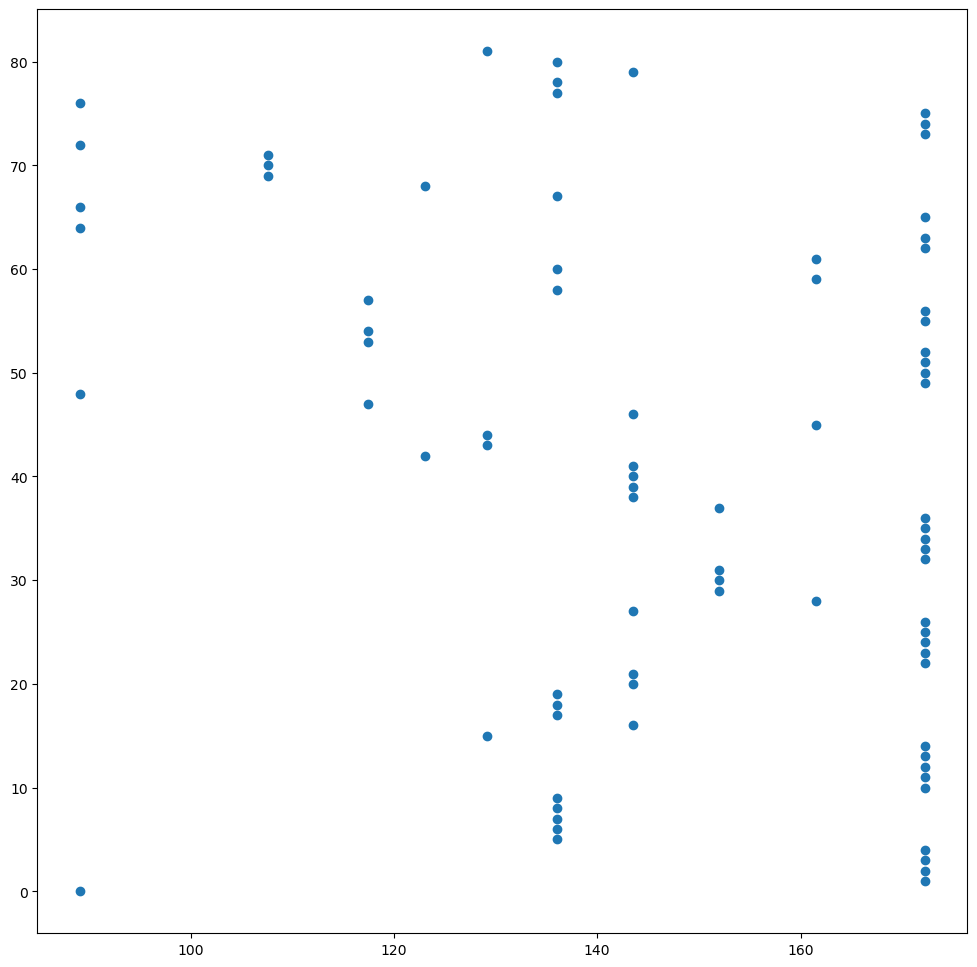

In [7]:
plt.figure(figsize=(12,12))
plt.scatter(tempo,[i for i in range(len(tempo))]) #clearly we can see batch batch of audio files in some regions.

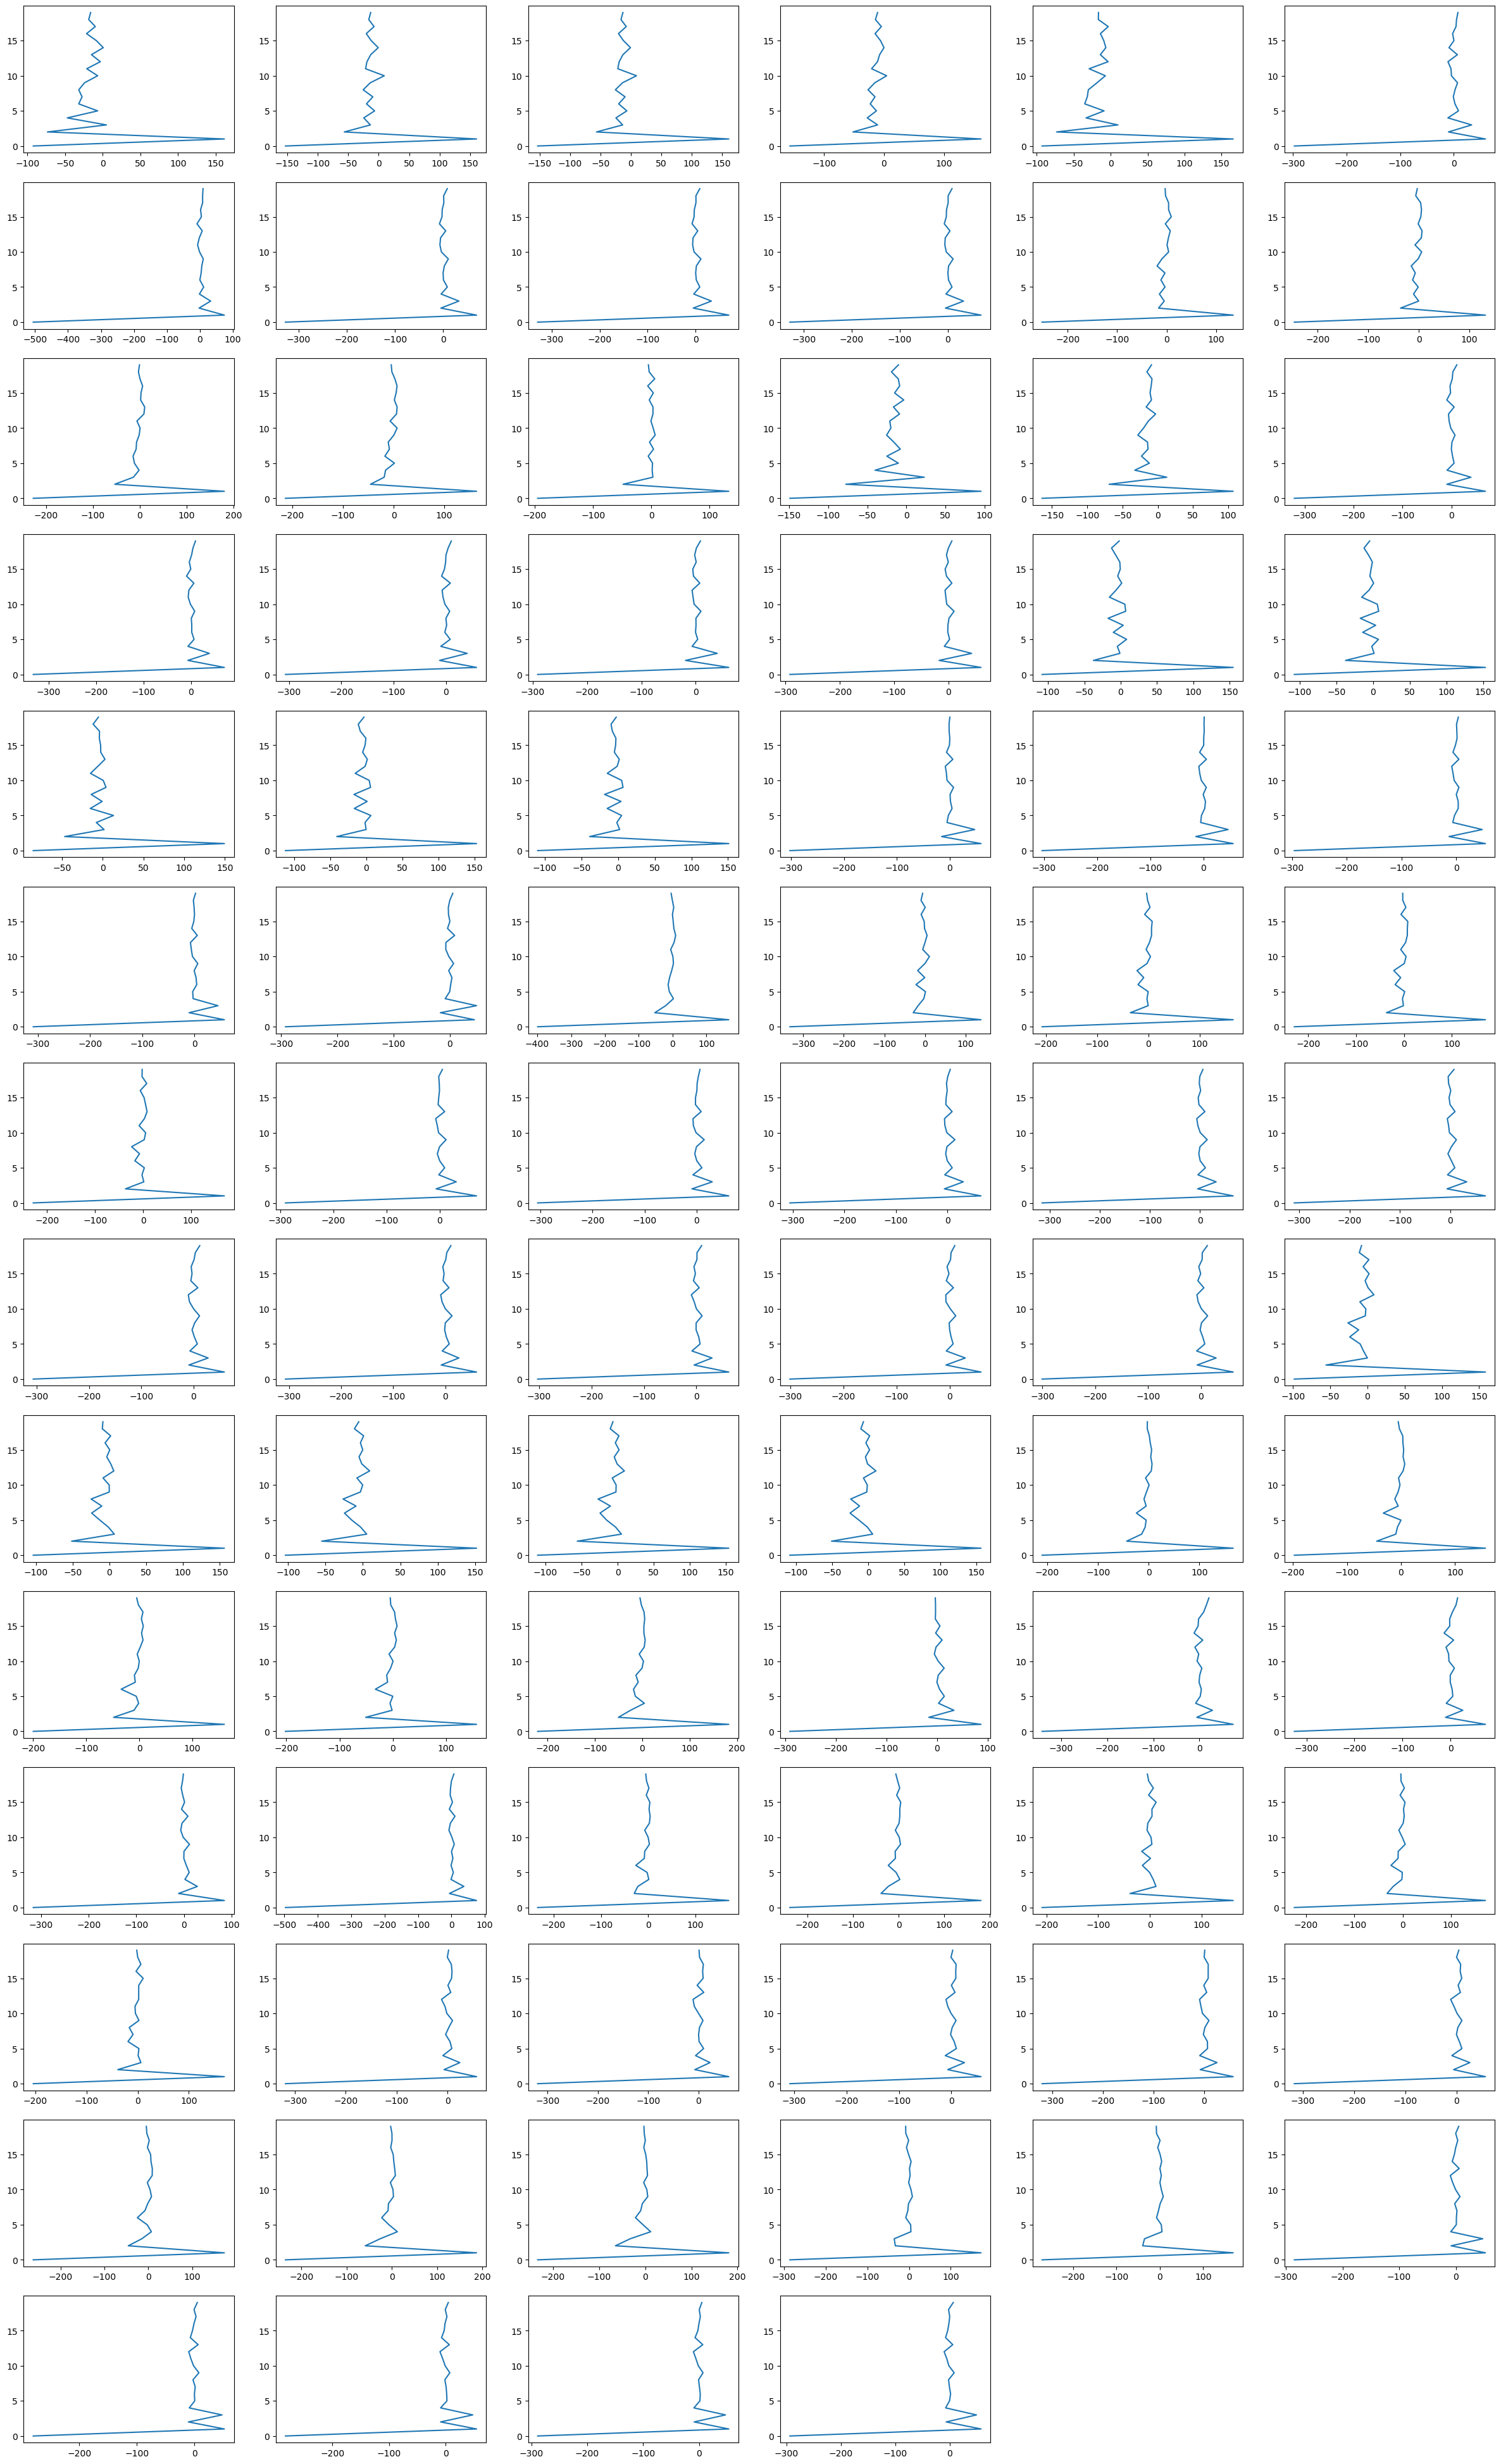

In [8]:
plt.figure(figsize=(30, 50))  # trying to observe similarites of each raga audio
plotnumber=1
for i, mcfs_i in enumerate(mcfs):
    ax=plt.subplot(14,6,plotnumber)
    plt.plot(mcfs_i, range(len(mcfs_i)))
    plotnumber+=1

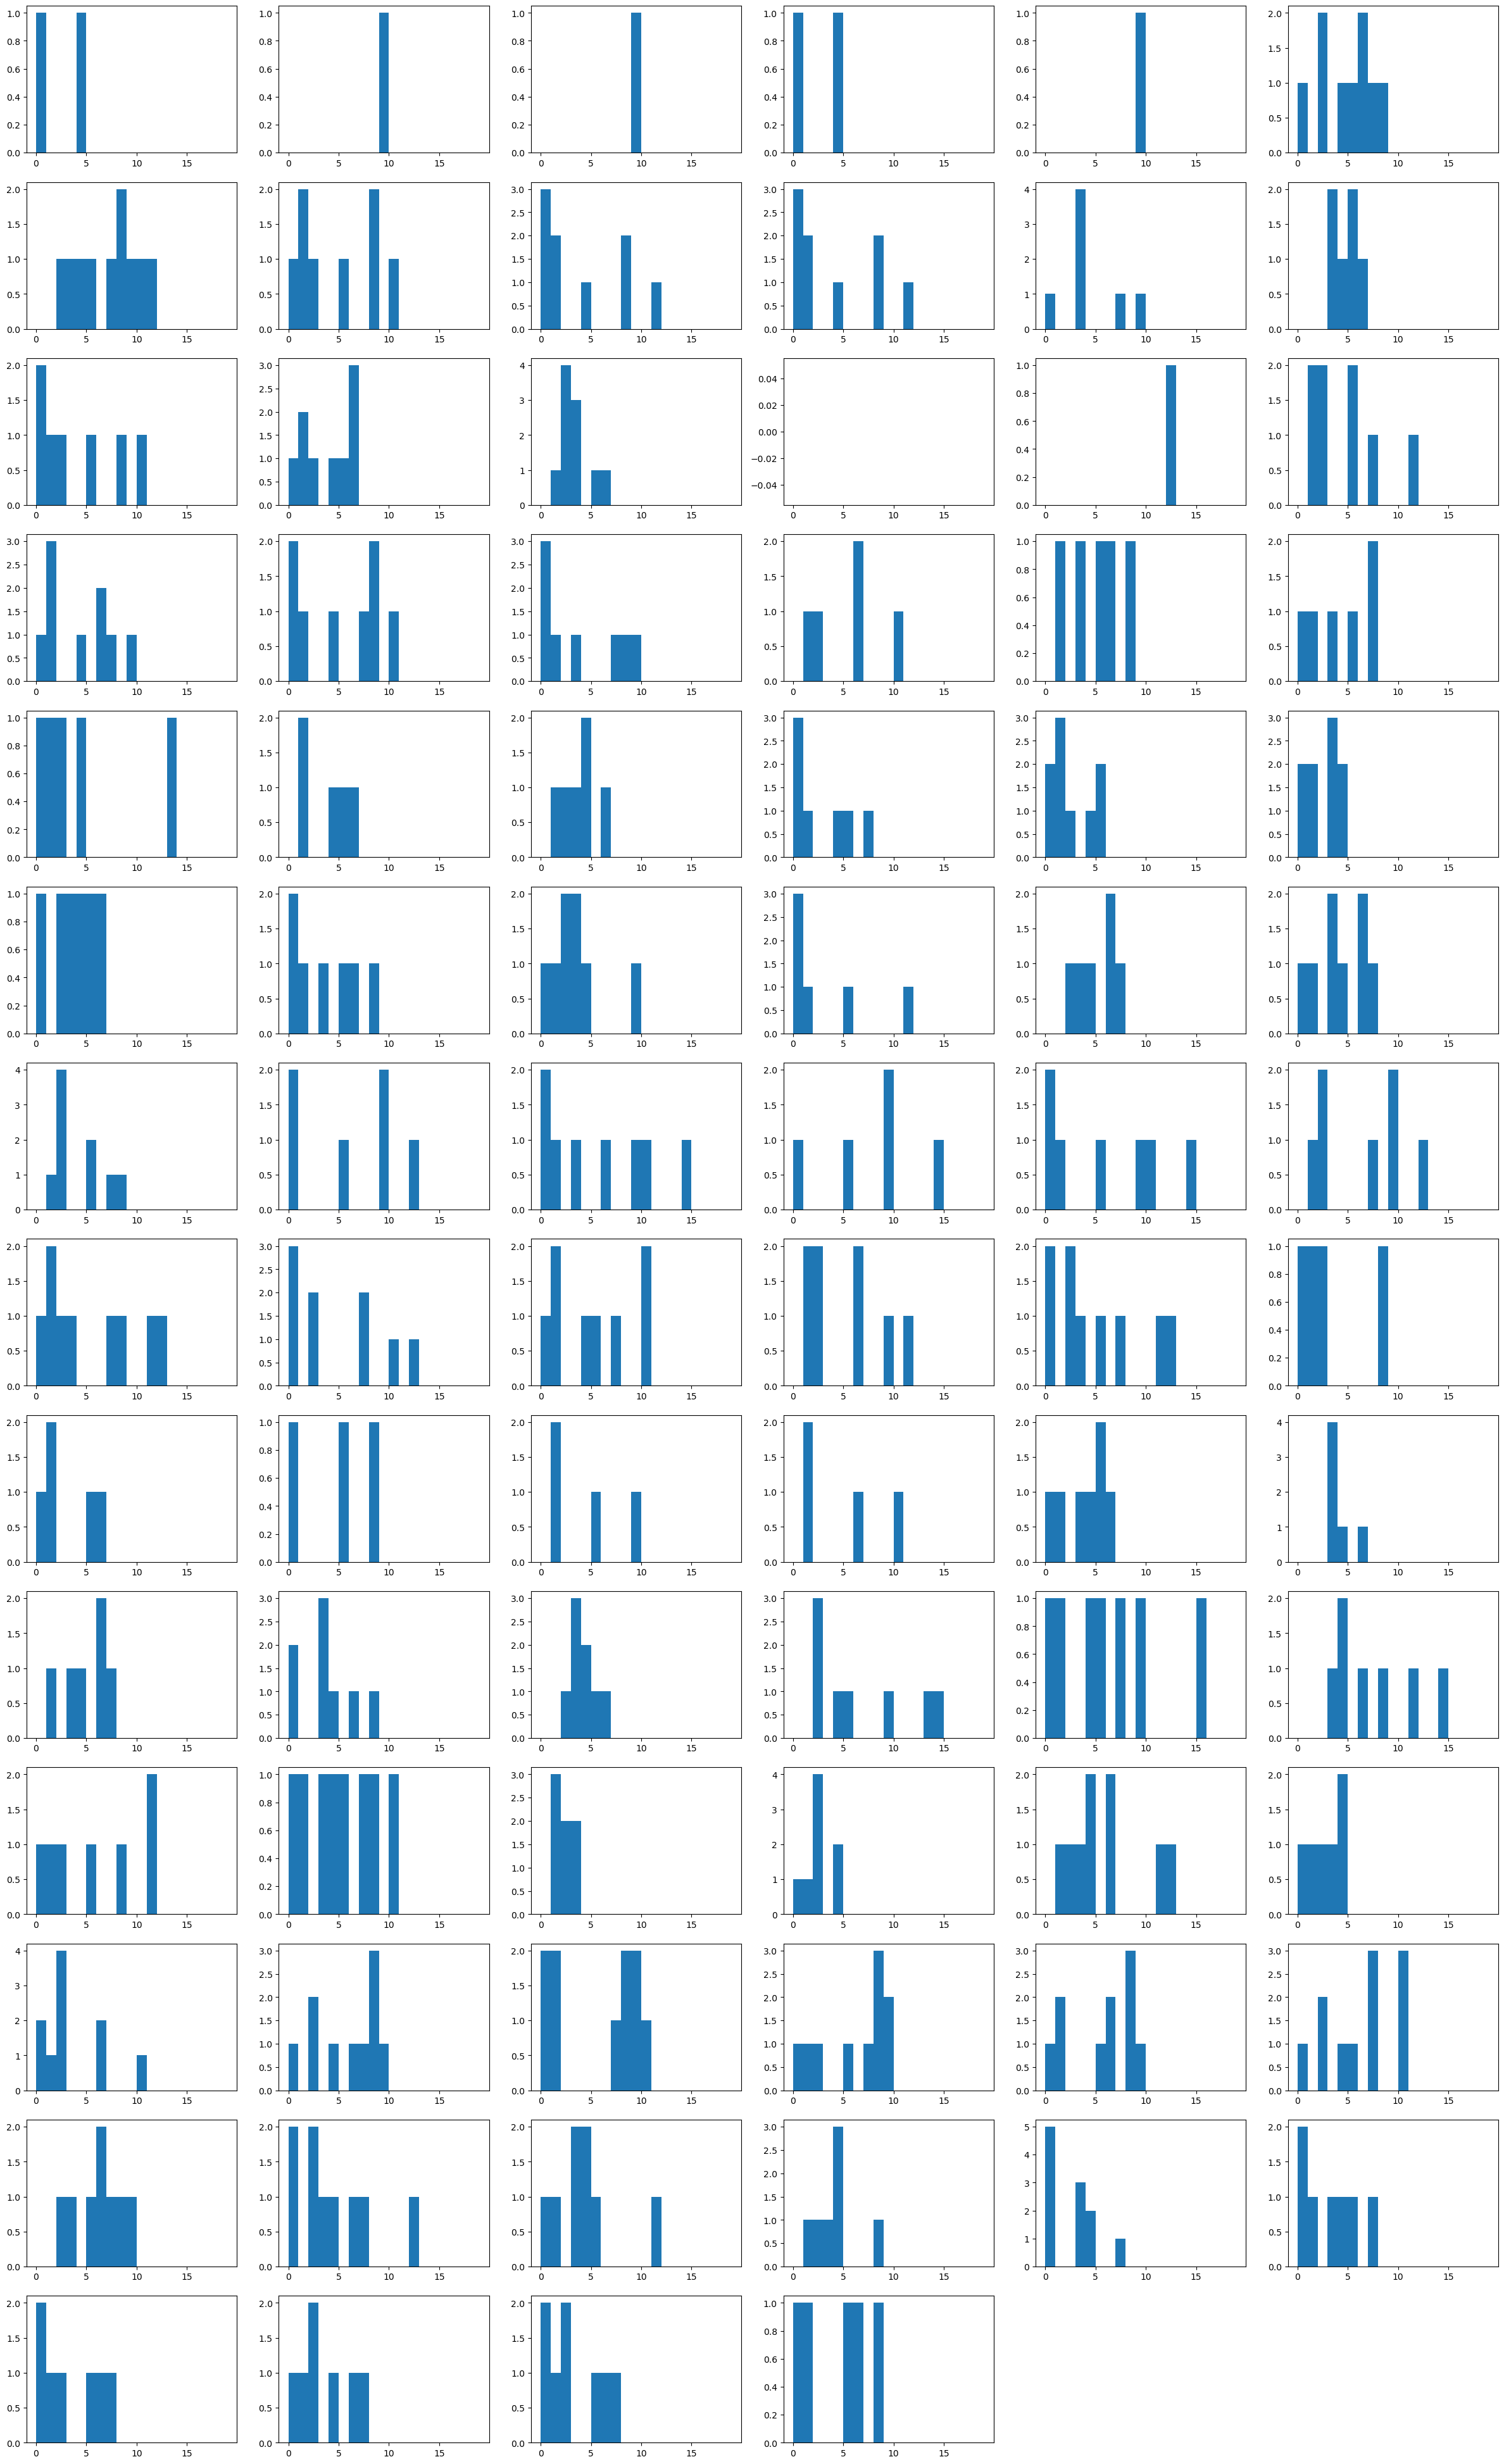

In [9]:
plt.figure(figsize=(30, 50))  # trying to observe similarites of each raga audio
plotnumber=1
for i, mcfs_i in enumerate(mcfs):
    ax=plt.subplot(14,6,plotnumber)
    plt.hist(mcfs_i, range(len(mcfs_i)))
    plotnumber+=1

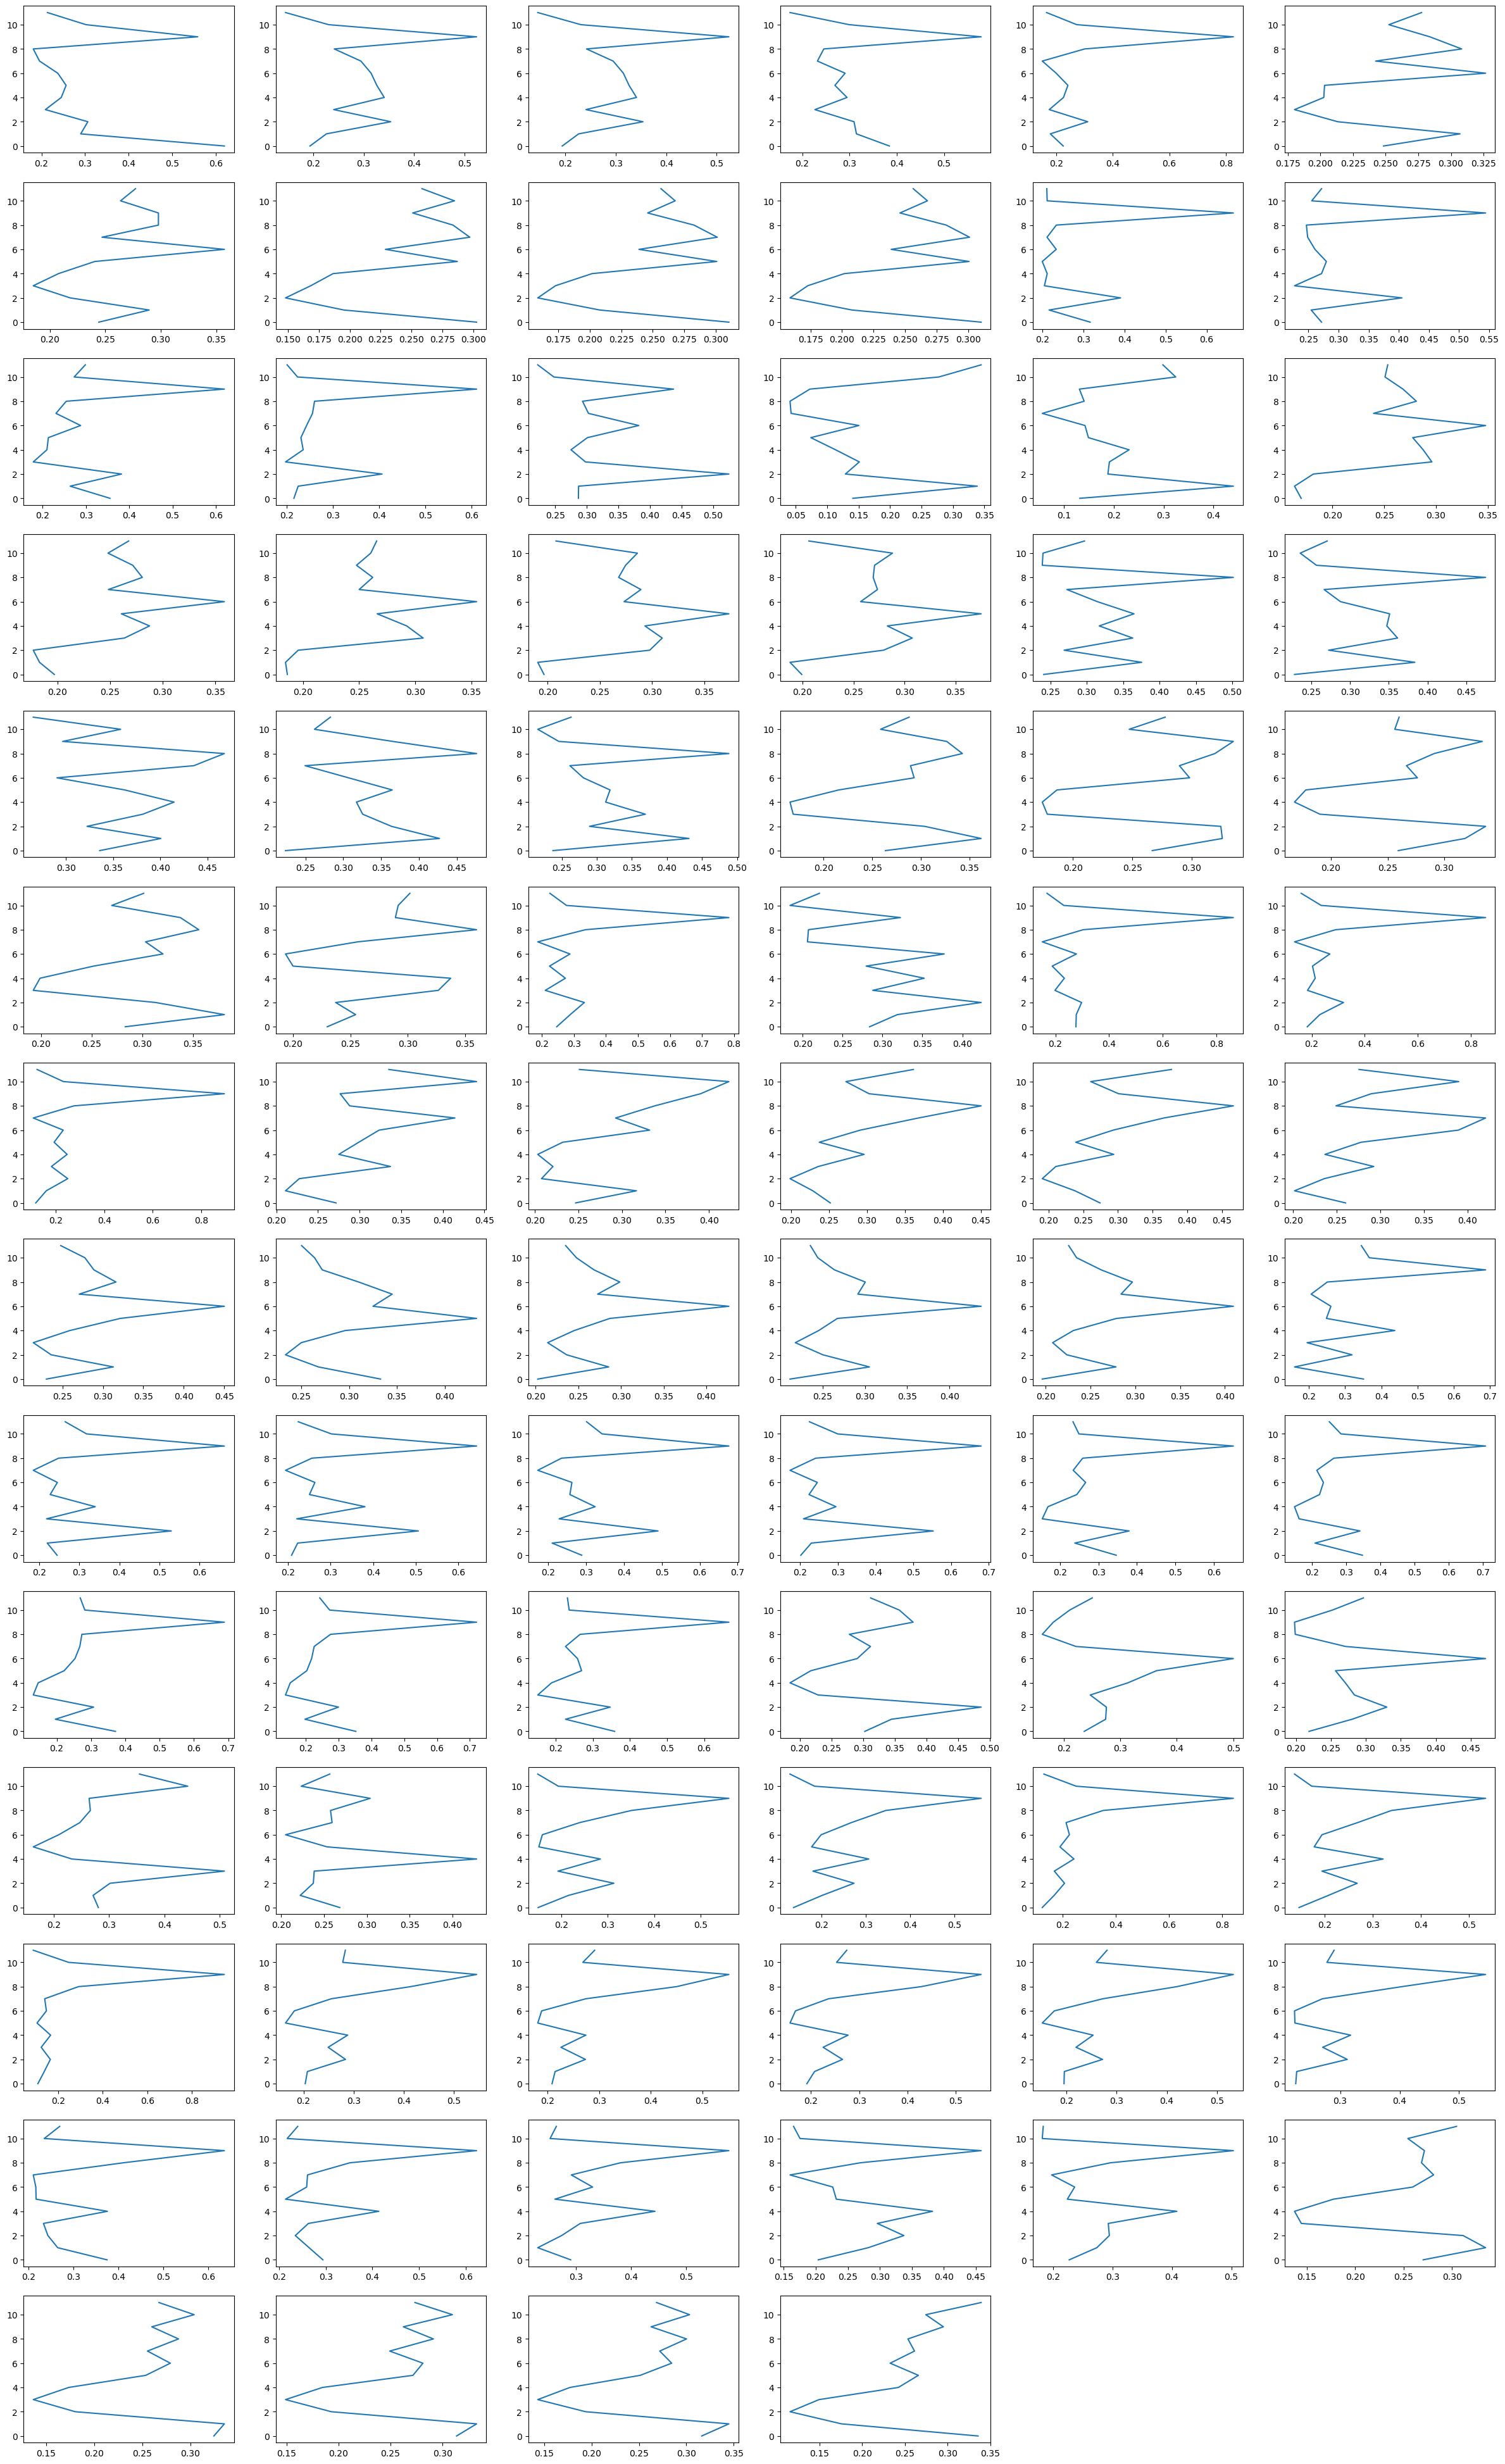

In [10]:
plt.figure(figsize=(30, 50))  #trying to observe similarites of each raga audio
plotnumber=1
for i in chroma:
    ax=plt.subplot(14,6,plotnumber)
    plt.plot(i, range(len(i)))
    plotnumber+=1

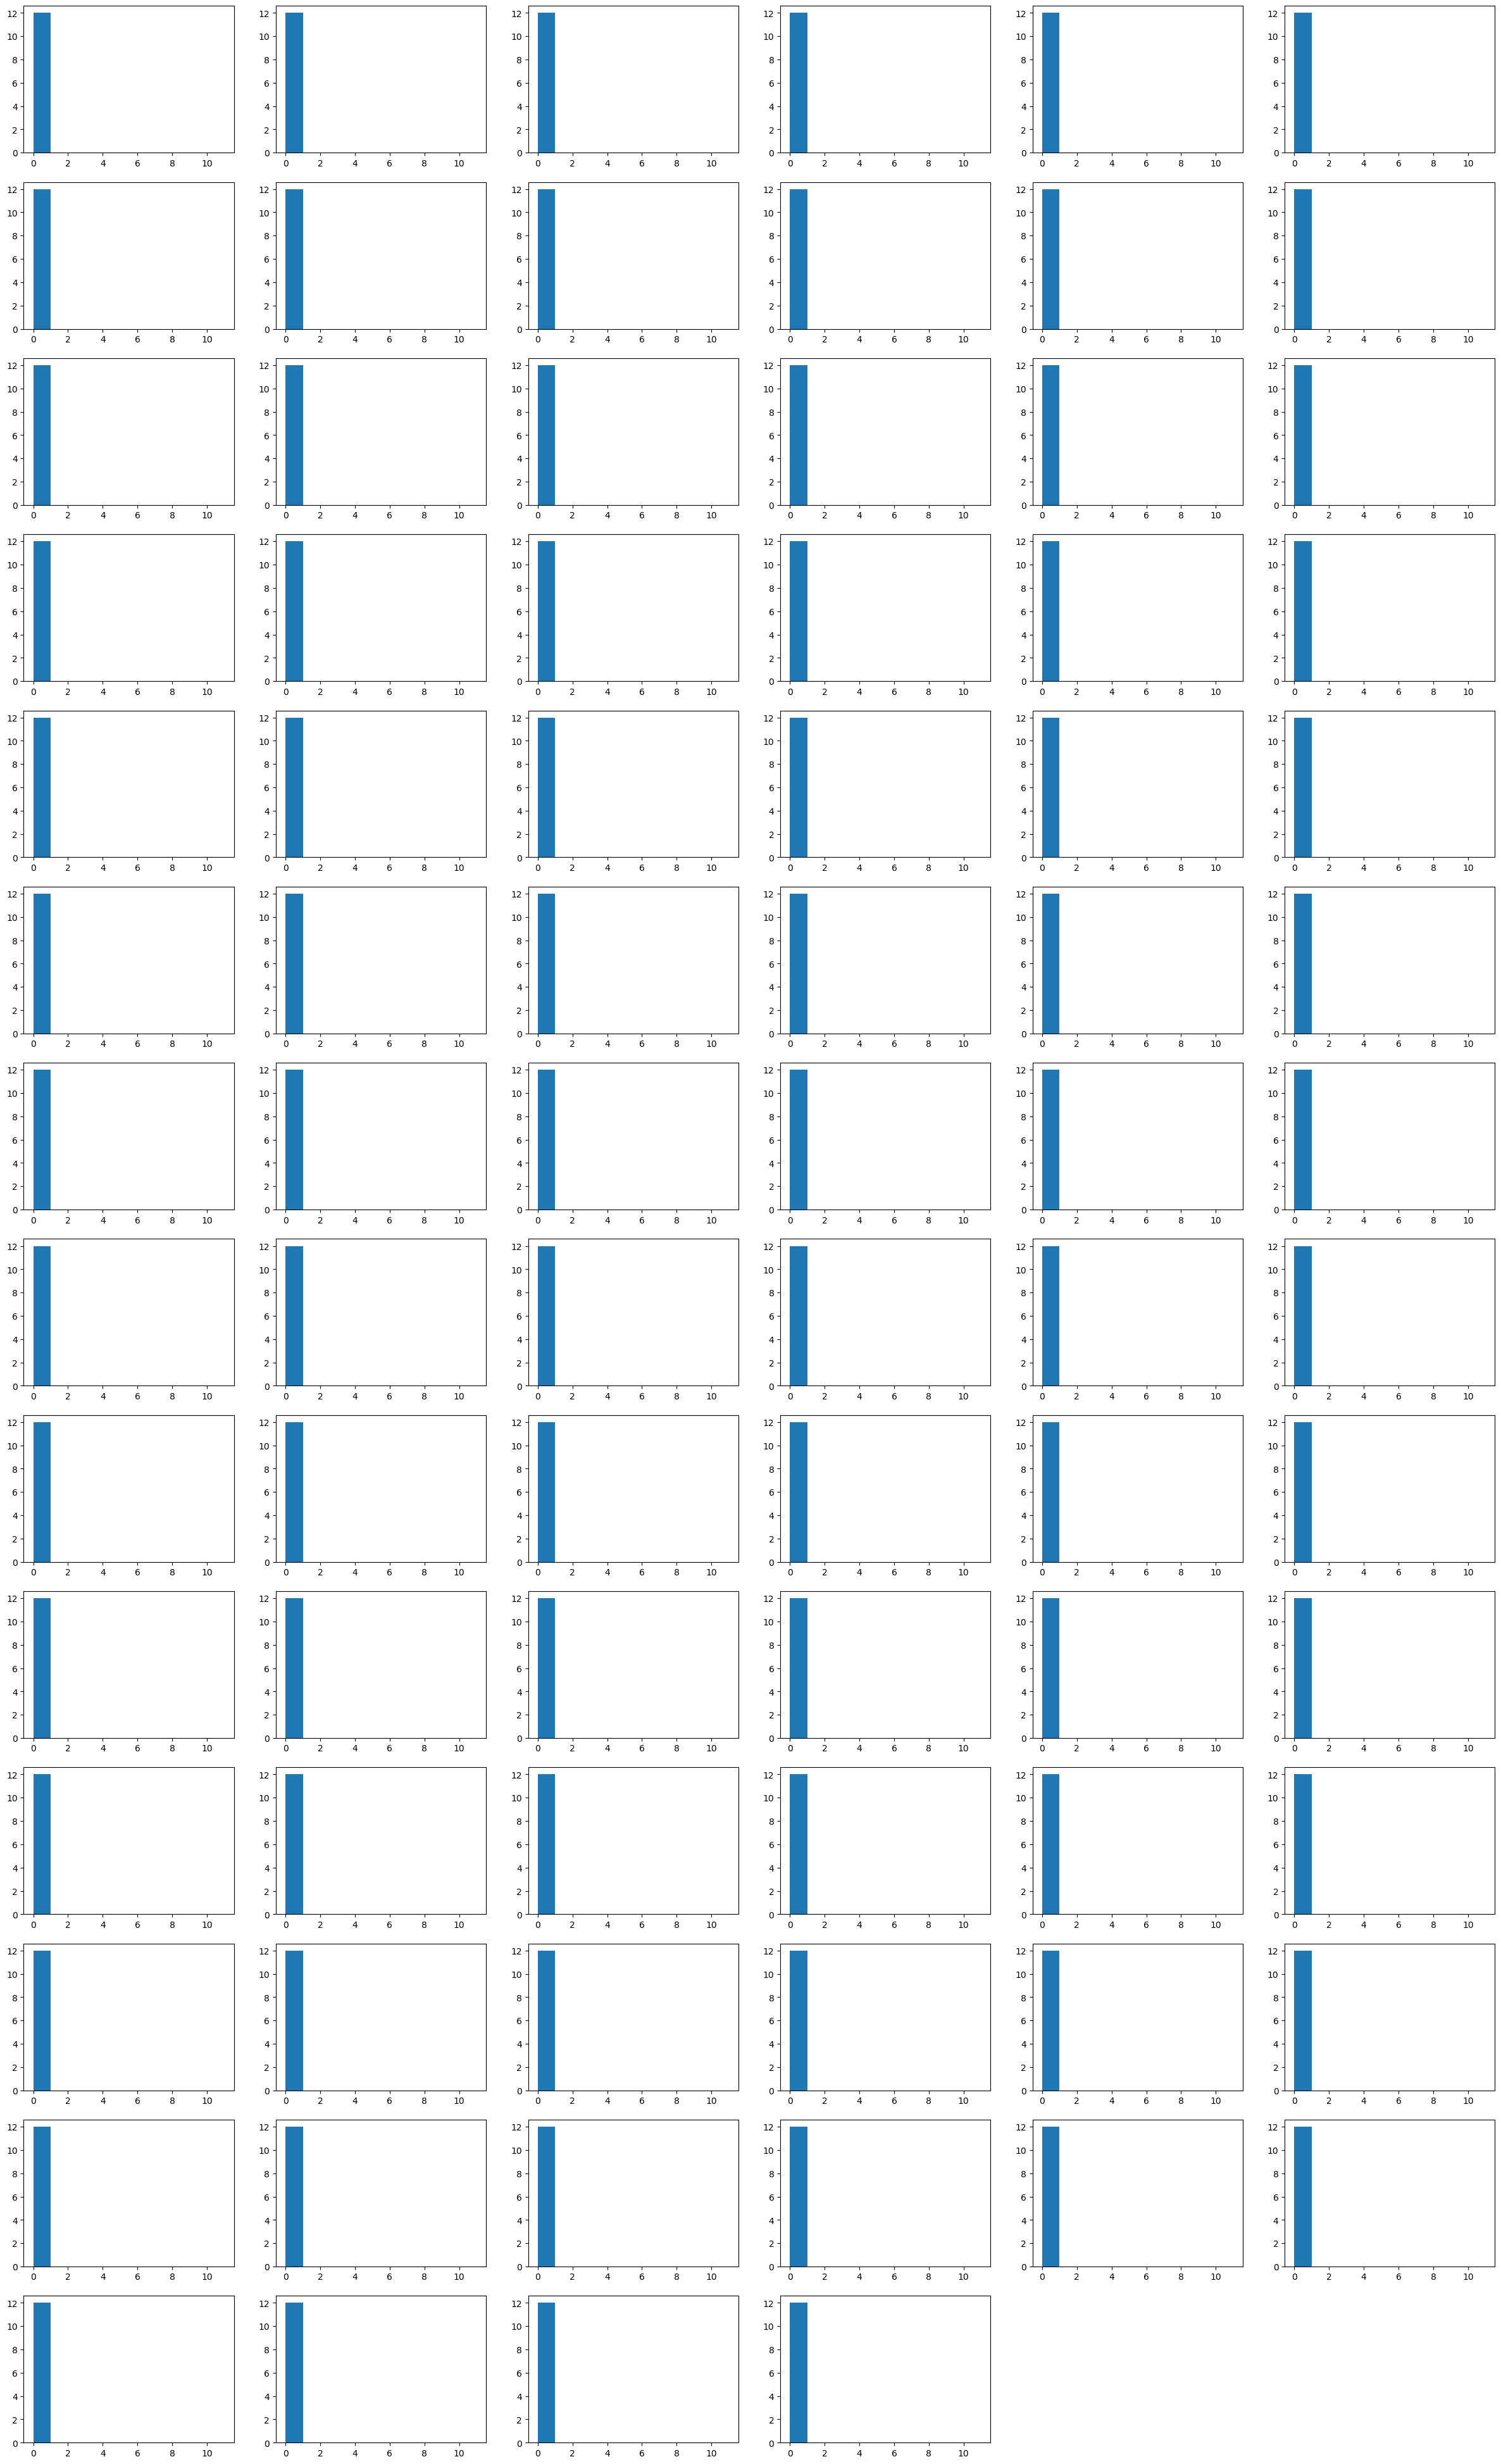

In [11]:
plt.figure(figsize=(30, 50))  # not able to conclude anything
plotnumber=1
for i in chroma:
    ax=plt.subplot(14,6,plotnumber)
    plt.hist(i, np.arange(len(i)))
    plotnumber+=1

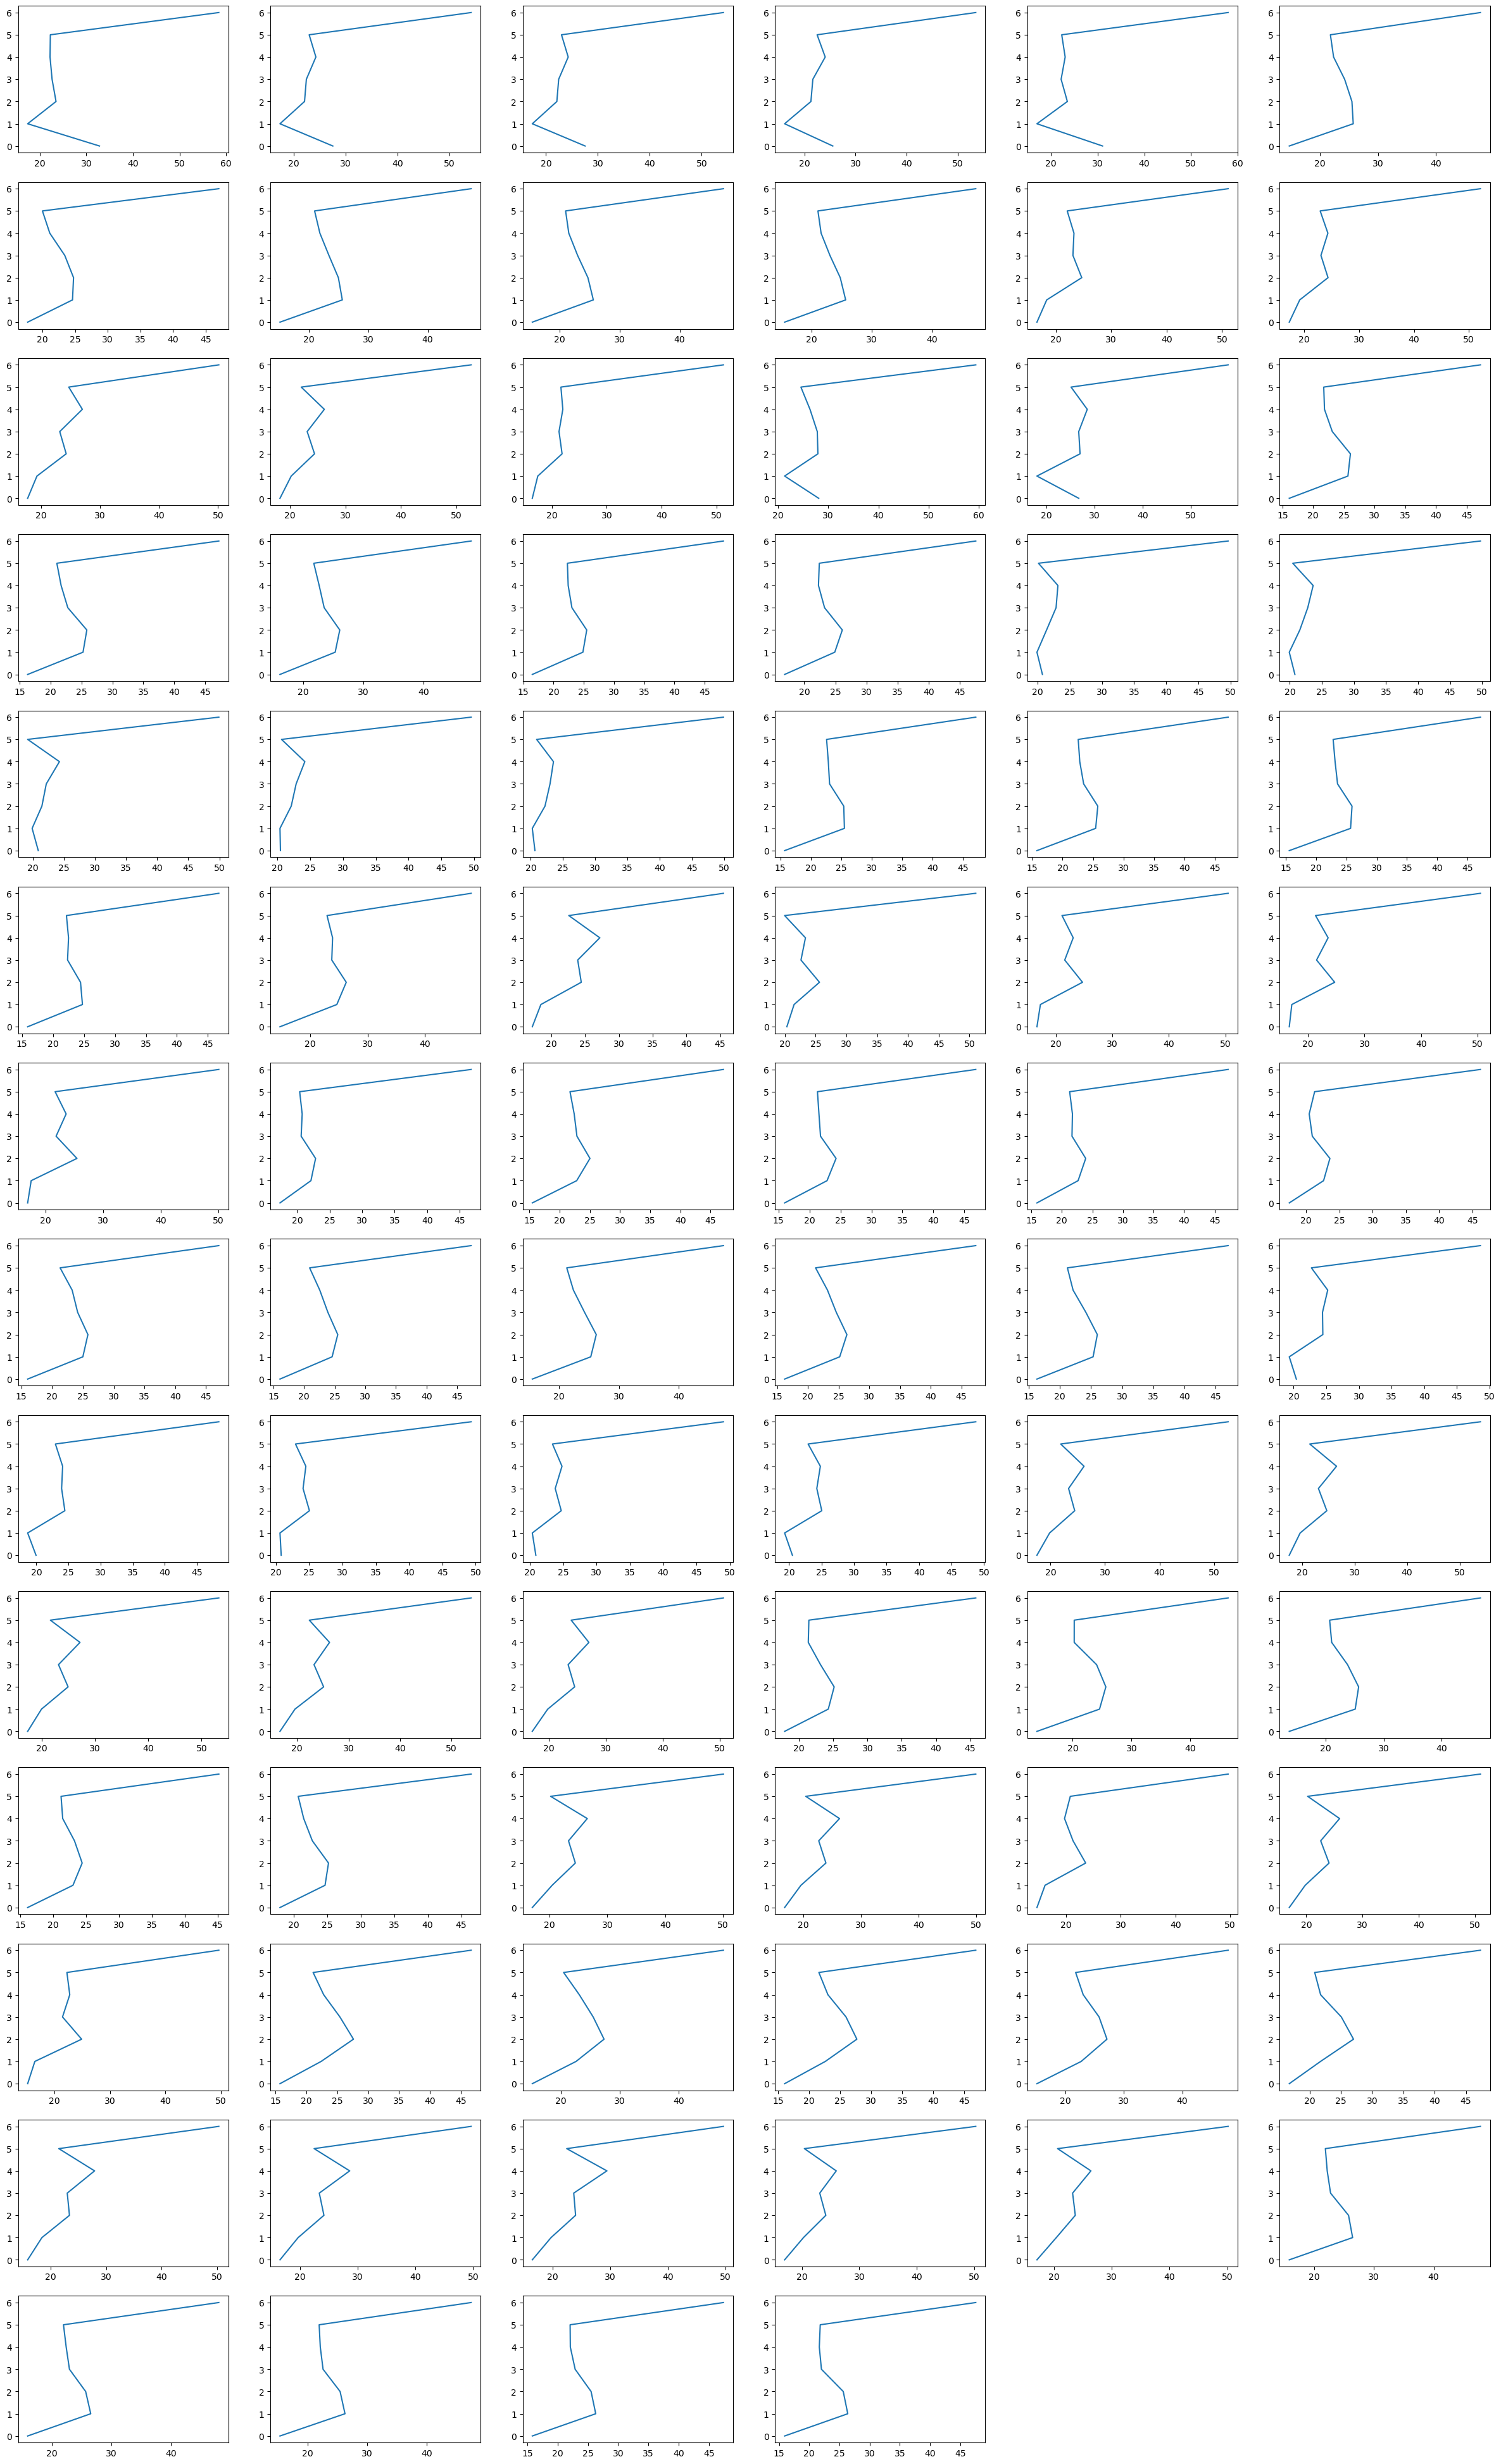

In [12]:
plt.figure(figsize=(30, 50)) # trying to observe similarites of each raga audio
plotnumber=1
for i in contrast:
    ax=plt.subplot(14,6,plotnumber)
    plt.plot(i, range(len(i)))
    plotnumber+=1

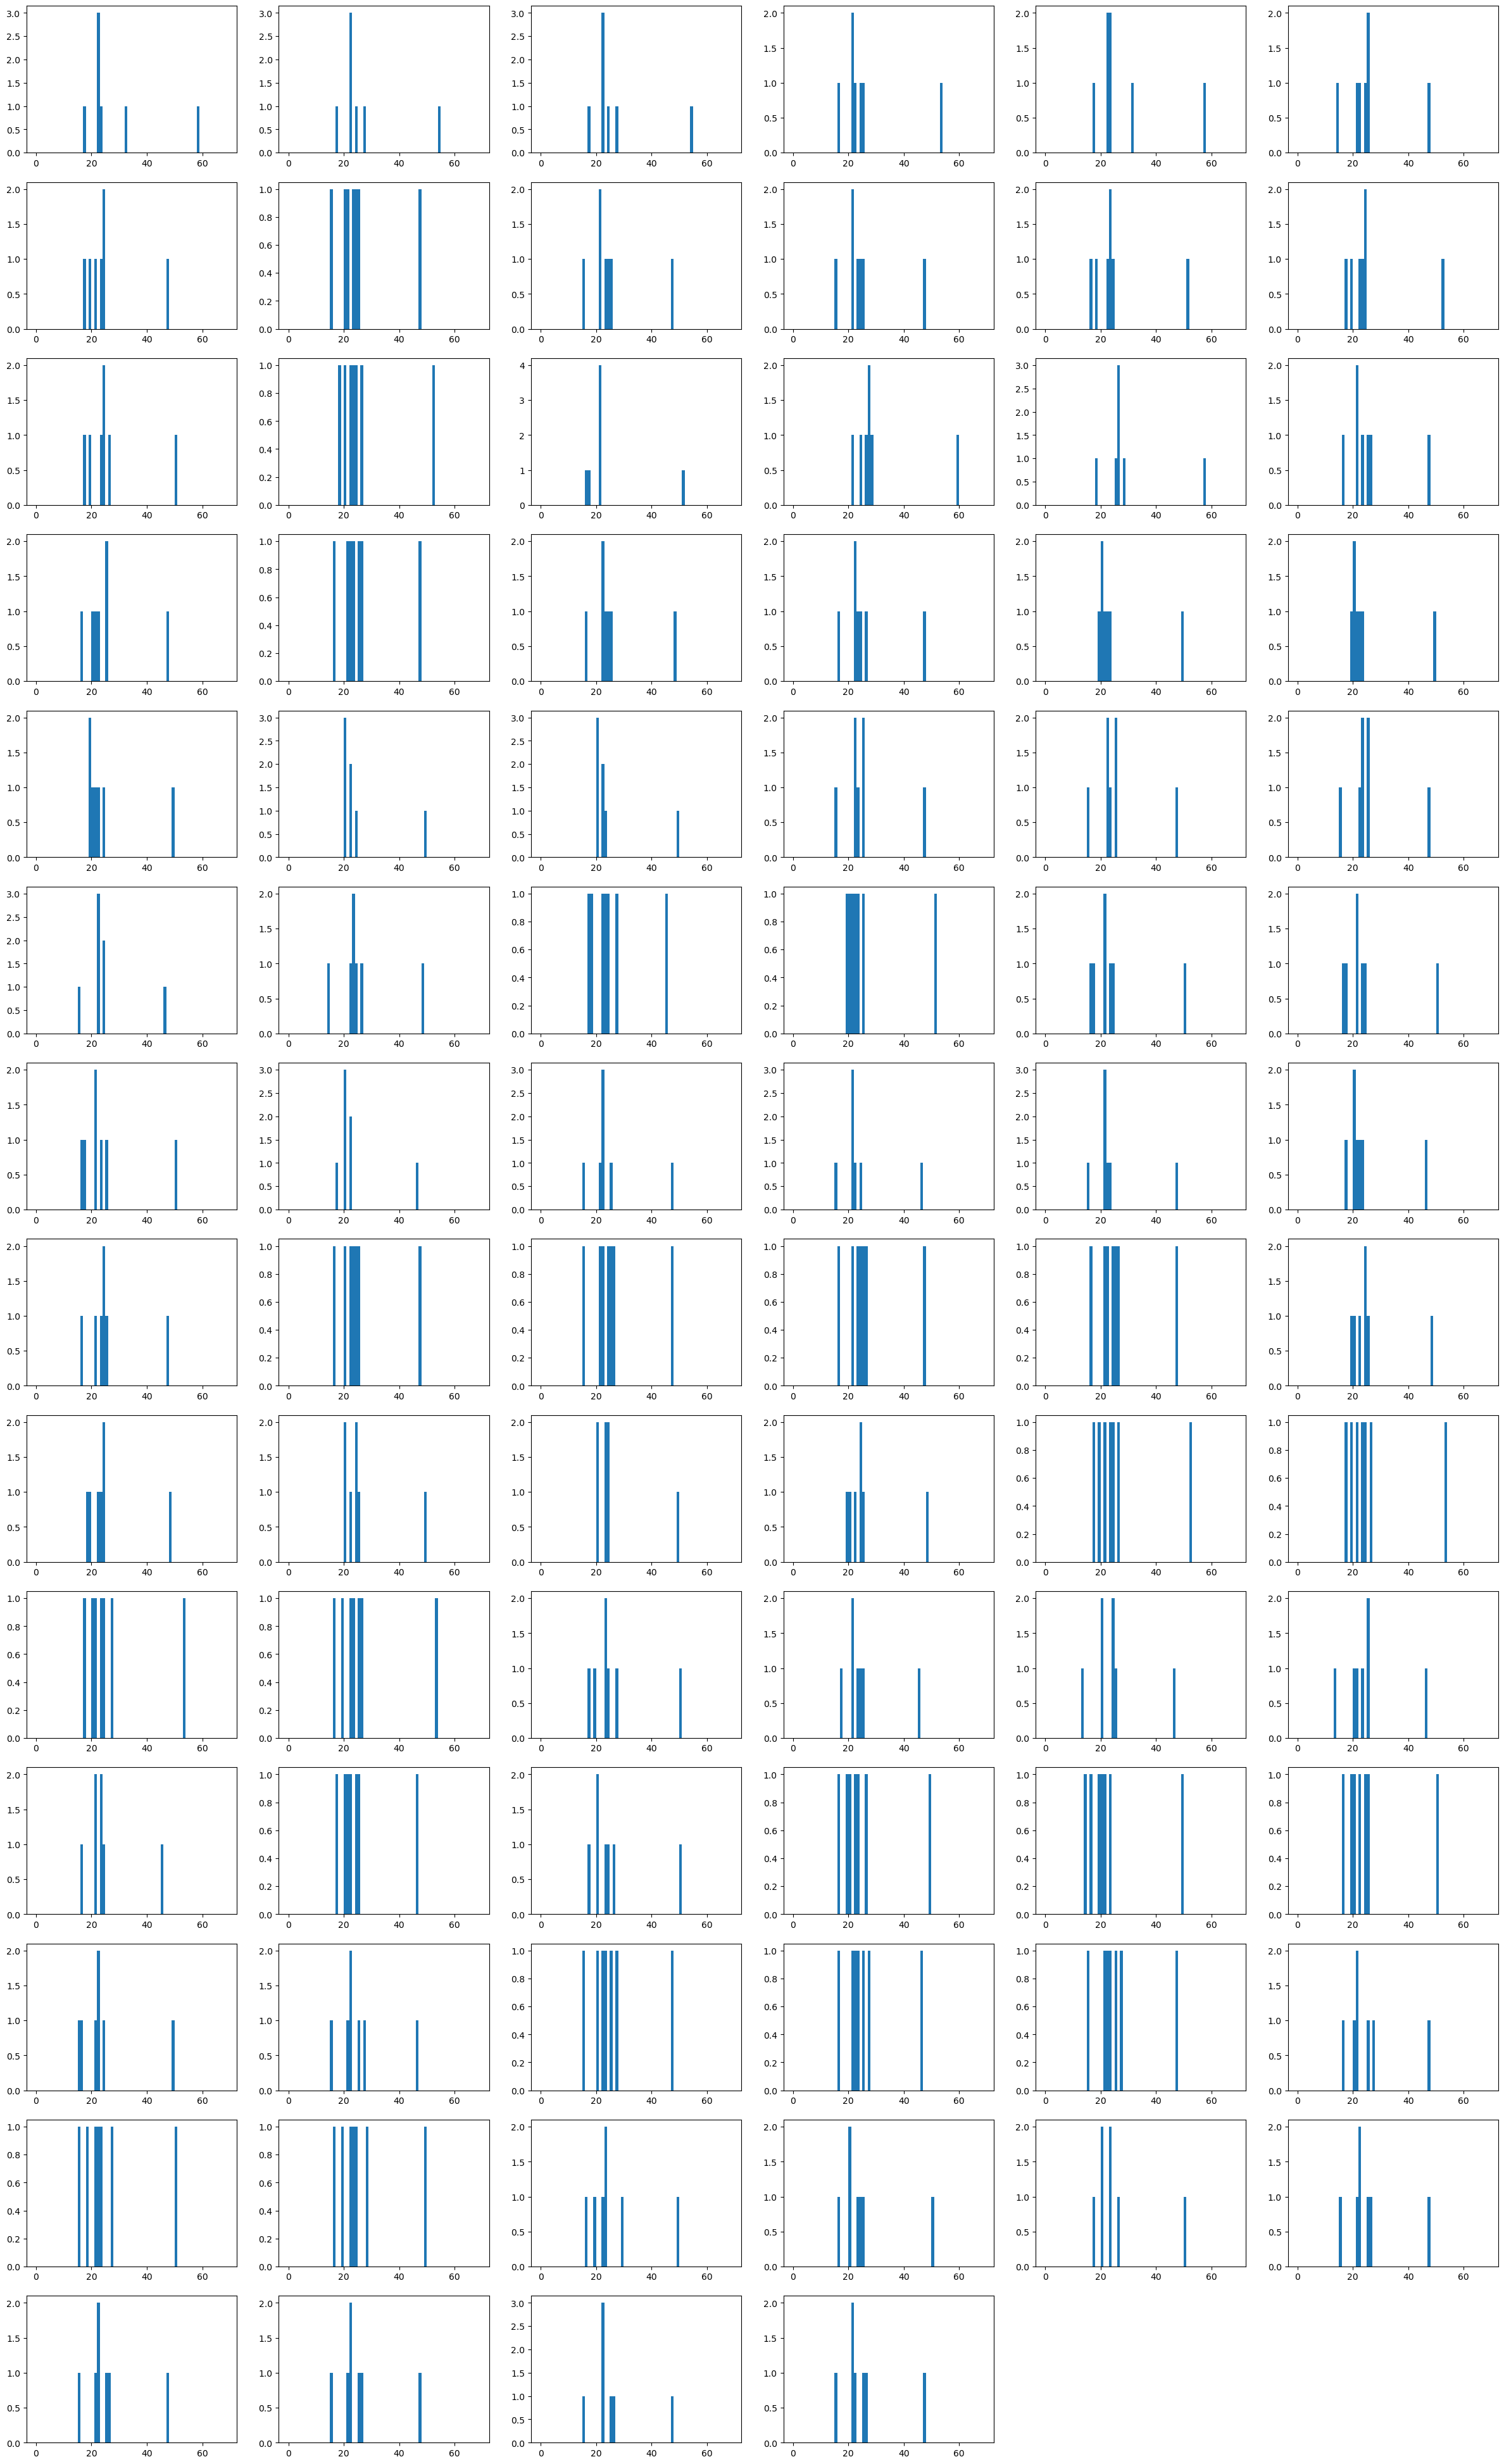

In [13]:
plt.figure(figsize=(30, 50))  #able to observe the width of histogram bar is varying
plotnumber=1
for i in contrast:
    ax=plt.subplot(14,6,plotnumber)
    plt.hist(i, range(len(i)*10))
    plotnumber+=1

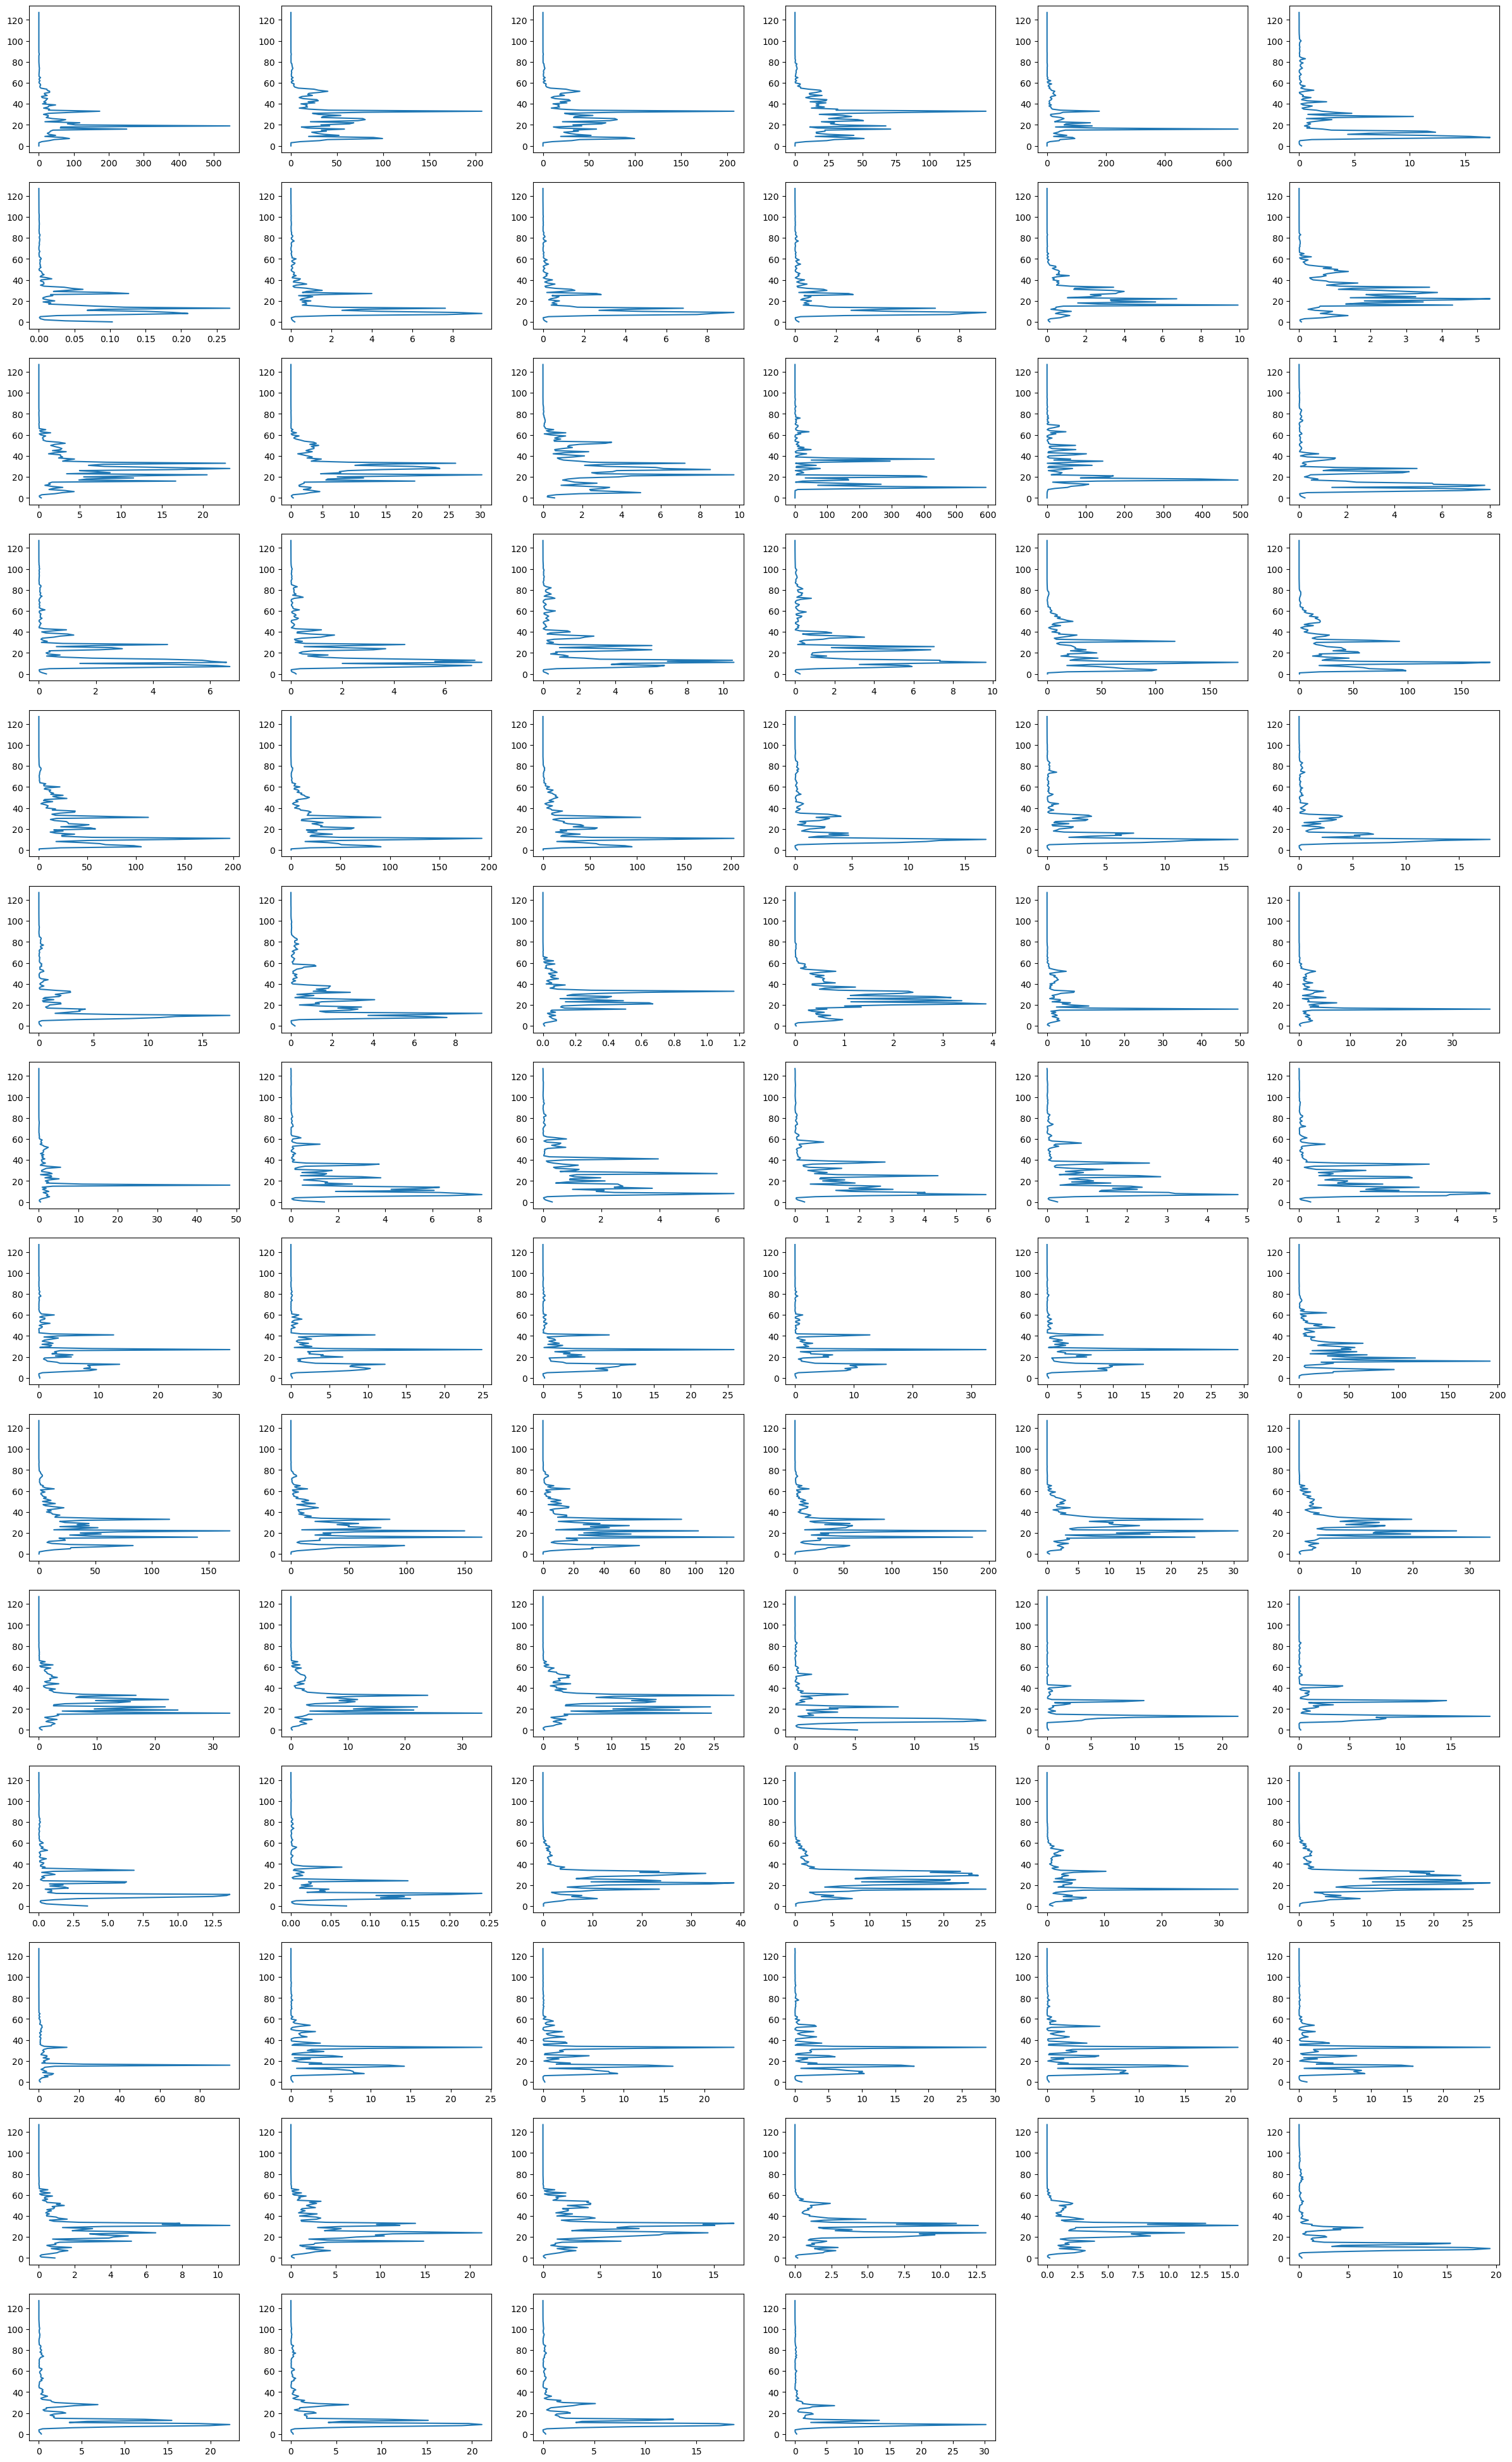

In [14]:
plt.figure(figsize=(30, 50))  # Create subplots figure
plotnumber=1
for i in mel:
    ax=plt.subplot(14,6,plotnumber)
    plt.plot(i, range(len(i)))
    plotnumber+=1

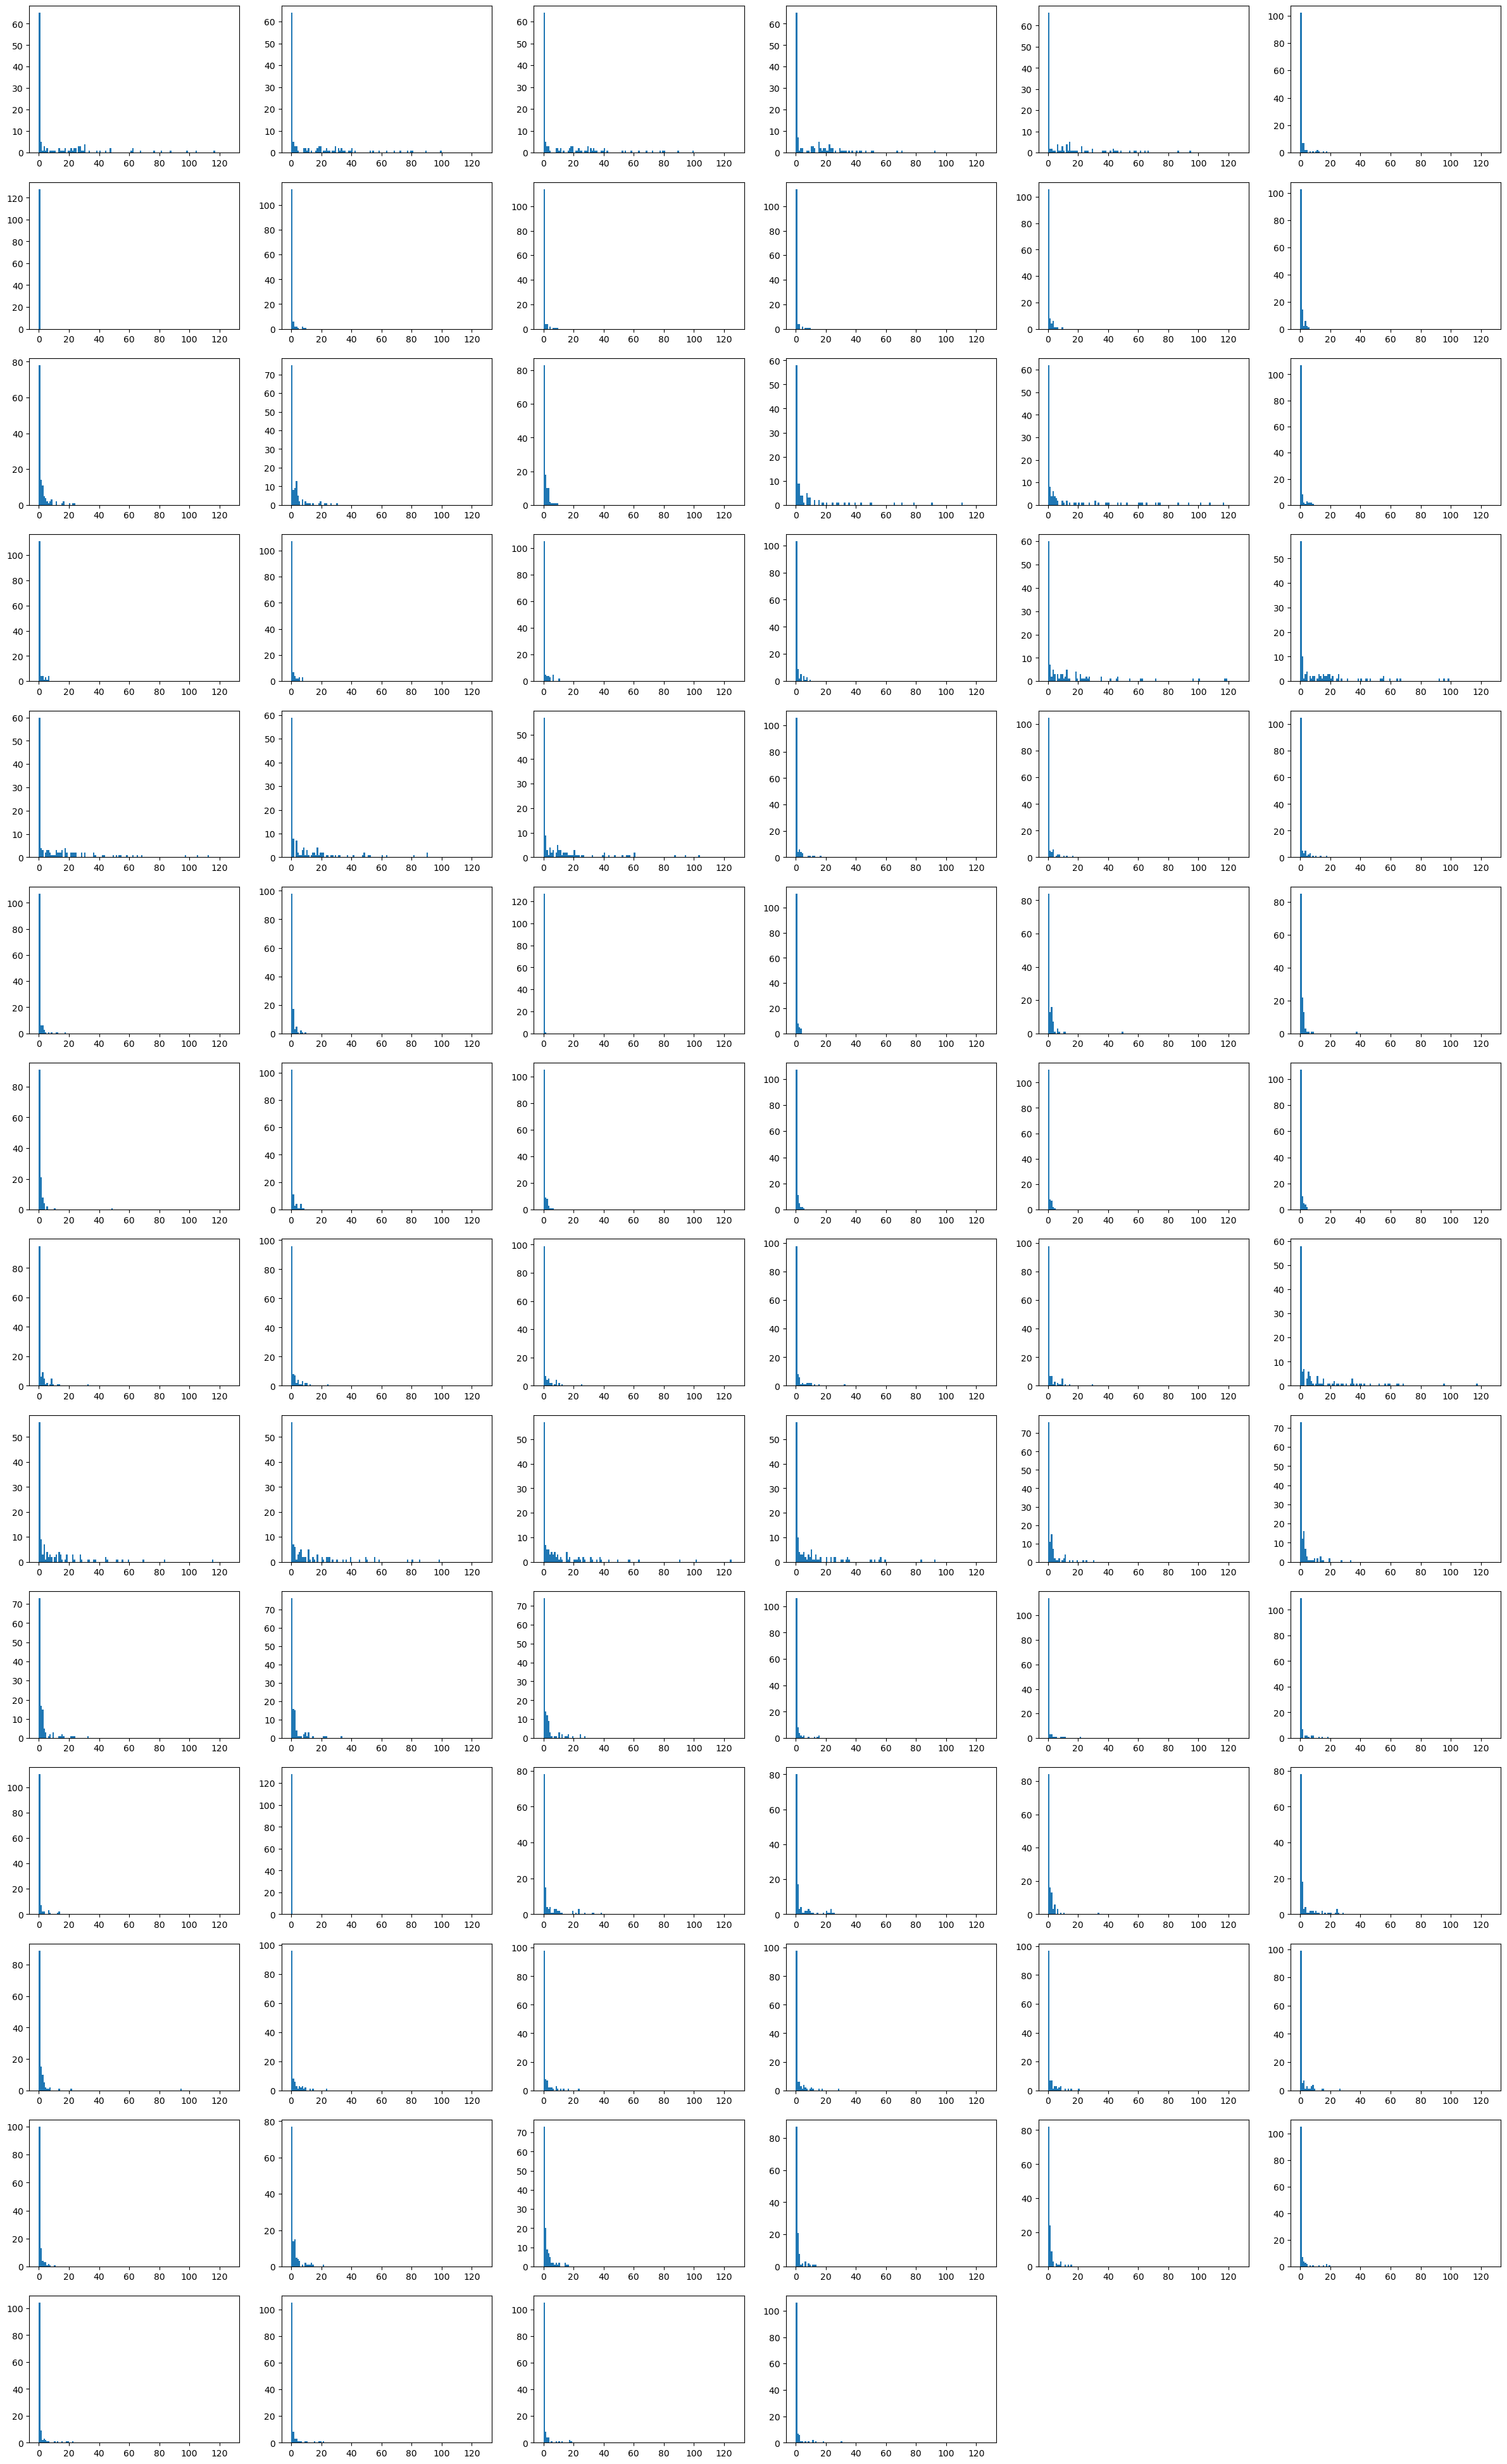

In [15]:
plt.figure(figsize=(30, 50))  # trying to observe similarities
plotnumber=1
for i in mel:
    ax=plt.subplot(14,6,plotnumber)
    plt.hist(i, range(len(i)))
    plotnumber+=1

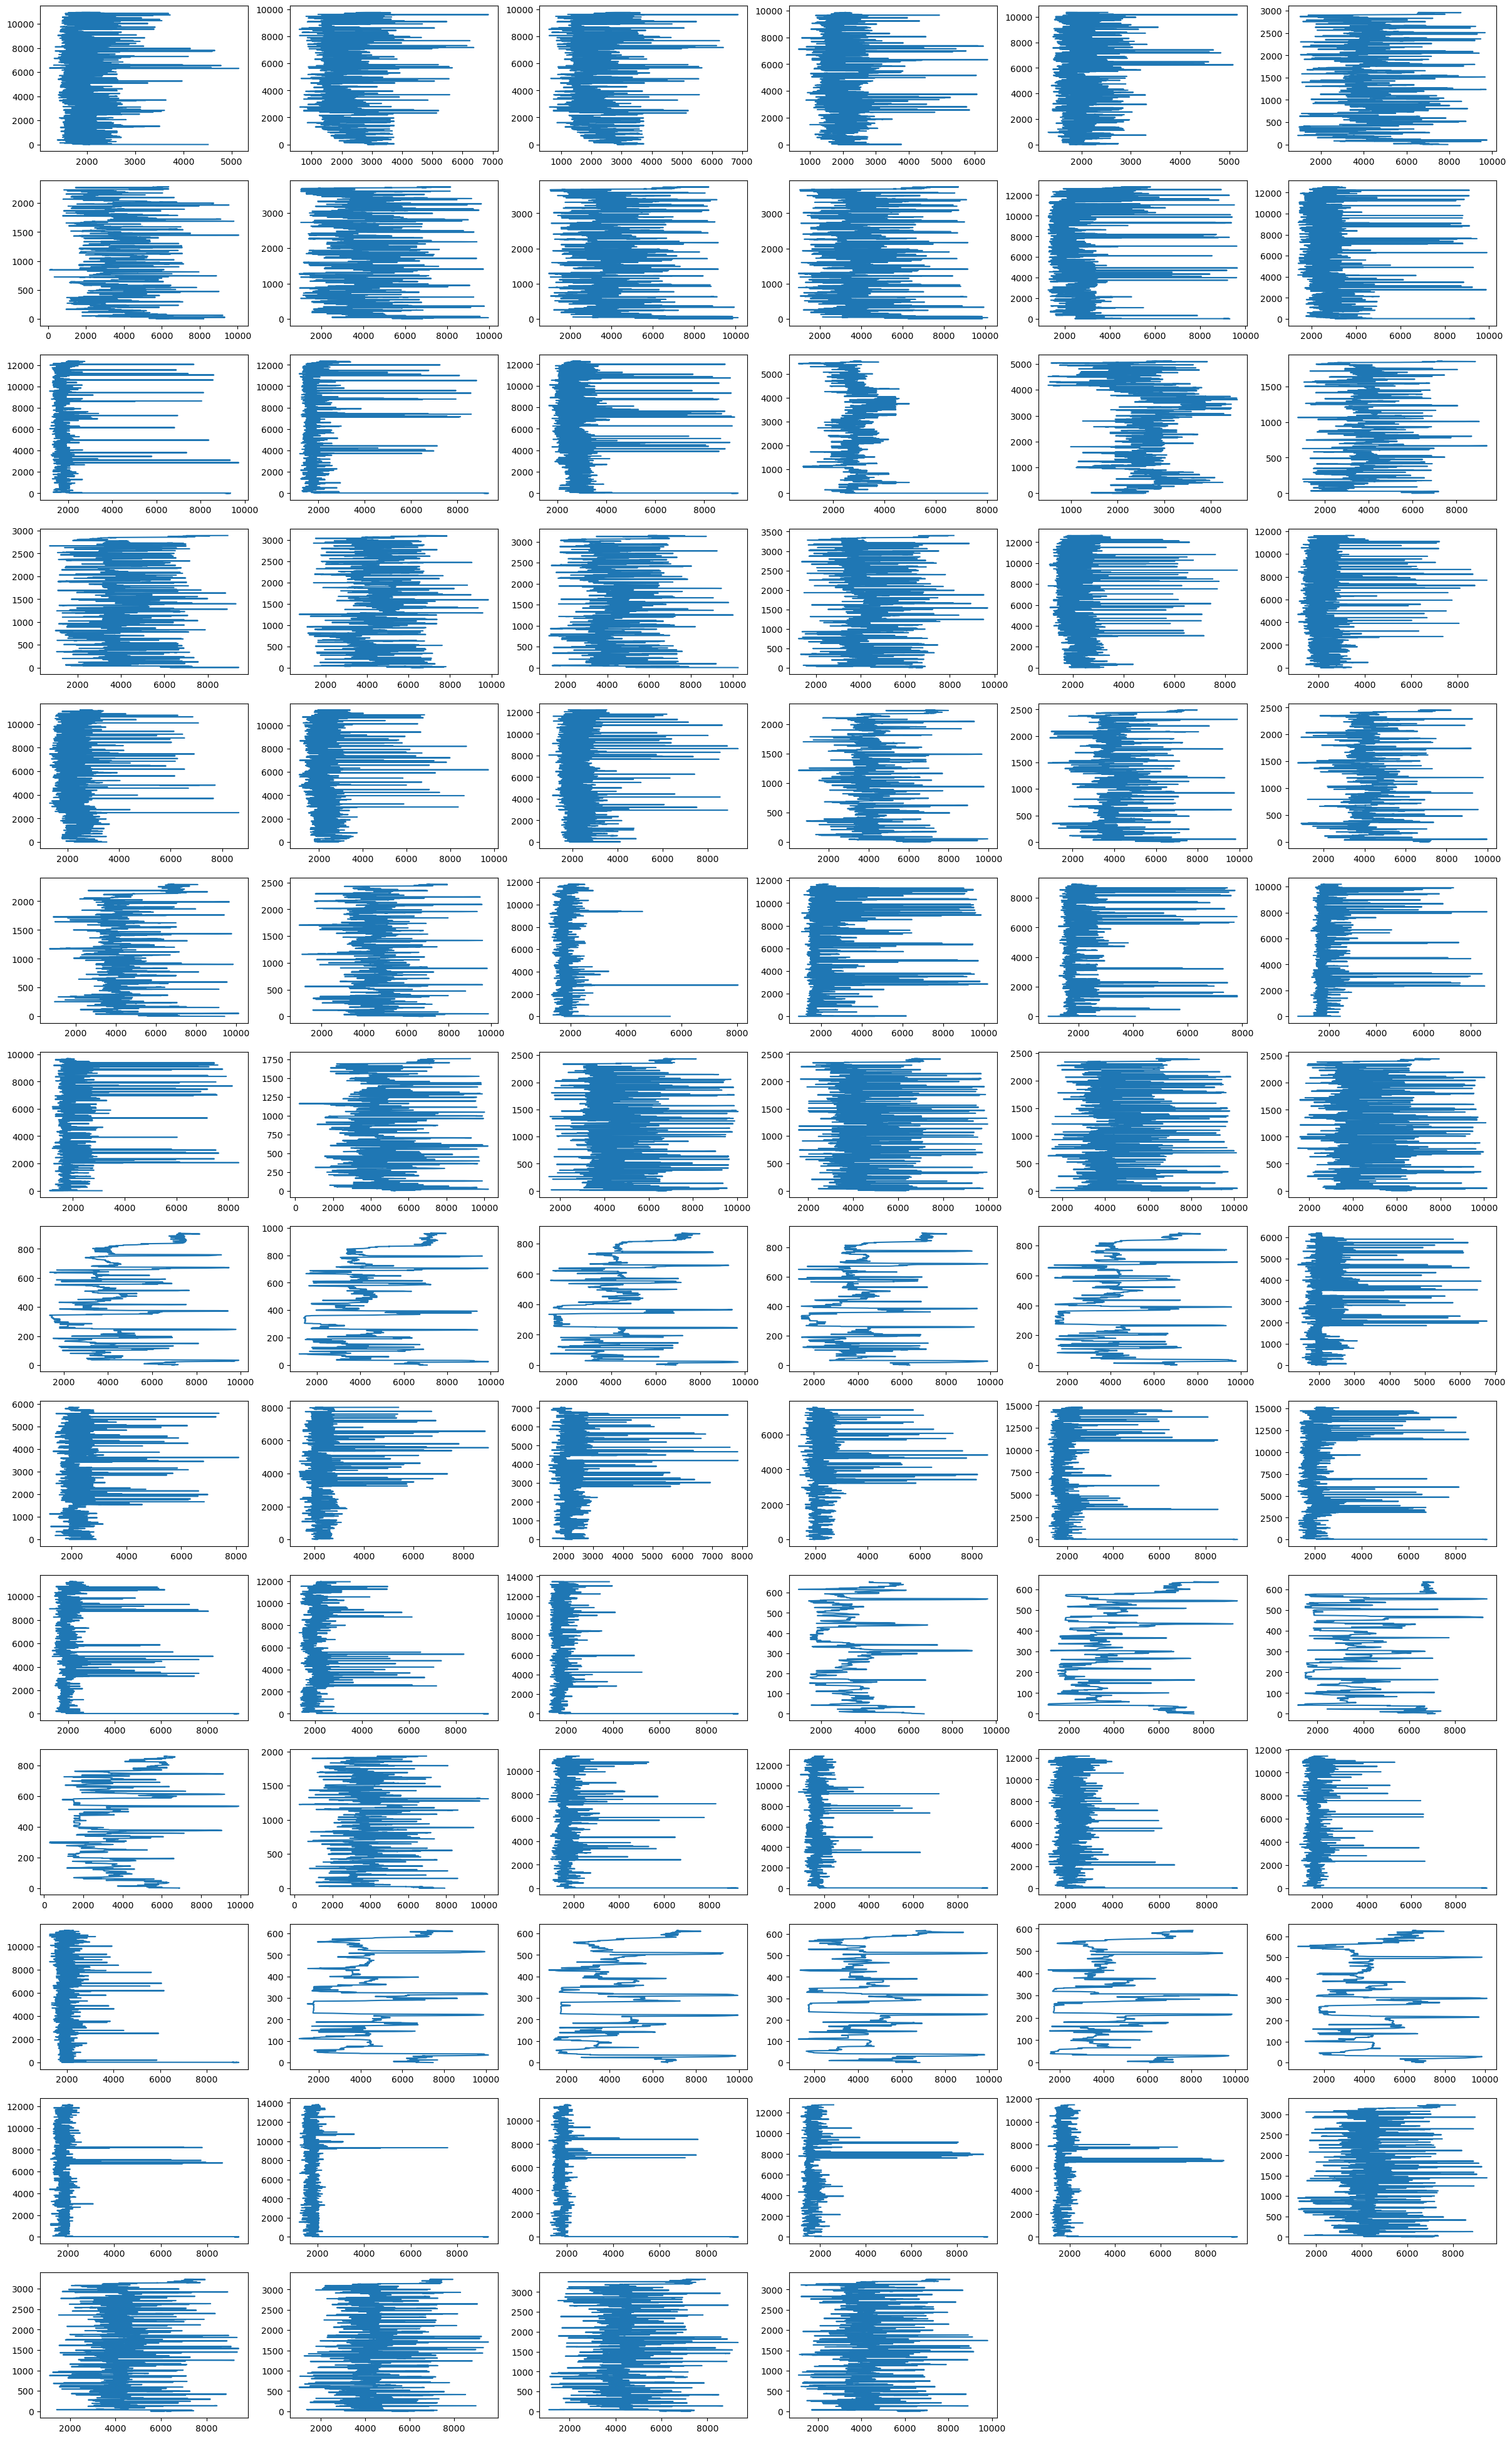

In [16]:
plt.figure(figsize=(30, 50))  # trying to observe similarites of each raga audio
plotnumber=1
for i in rolloff:
    ax=plt.subplot(14,6,plotnumber)
    plt.plot(i, range(len(i)))
    plotnumber+=1

In [17]:
#trying train on following features
features=[np.hstack([mcfs[i],chroma[i],contrast[i],mel[i]]).tolist() for i in range(len(mcfs))]

In [18]:
features = np.array(features)
encoded_labels = np.array(encoded_labels)

In [19]:
X_train,X_val,y_train,y_val=train_test_split(features,encoded_labels,test_size=0.2,random_state=17)

In [20]:
model = Sequential([
        layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(167,1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(len(np.unique(encoded_labels)), activation='softmax')
        ])

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'],)
        #training the model
histroy=model.fit(X_train, y_train, epochs=90, validation_data=(X_val, y_val))

Epoch 1/90
3/3 [==============================] - 1s 159ms/step - loss: 4.1423 - accuracy: 0.1385 - val_loss: 2.6828 - val_accuracy: 0.2353
Epoch 2/90
3/3 [==============================] - 0s 22ms/step - loss: 2.4012 - accuracy: 0.2000 - val_loss: 2.5550 - val_accuracy: 0.0588
Epoch 3/90
3/3 [==============================] - 0s 21ms/step - loss: 2.1307 - accuracy: 0.1846 - val_loss: 2.7954 - val_accuracy: 0.0588
Epoch 4/90
3/3 [==============================] - 0s 21ms/step - loss: 1.8356 - accuracy: 0.2769 - val_loss: 2.9799 - val_accuracy: 0.1765
Epoch 5/90
3/3 [==============================] - 0s 21ms/step - loss: 1.4998 - accuracy: 0.4615 - val_loss: 2.4526 - val_accuracy: 0.3529
Epoch 6/90
3/3 [==============================] - 0s 21ms/step - loss: 1.3453 - accuracy: 0.6154 - val_loss: 2.2884 - val_accuracy: 0.2941
Epoch 7/90
3/3 [==============================] - 0s 21ms/step - loss: 1.4024 - accuracy: 0.4769 - val_loss: 2.2032 - val_accuracy: 0.3529
Epoch 8/90
3/3 [==========

In [22]:
acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
val_loss = histroy.history['val_loss']
loss = histroy.history['loss']

Text(0.5, 1.0, 'Acurracy and Validation Accuracy')

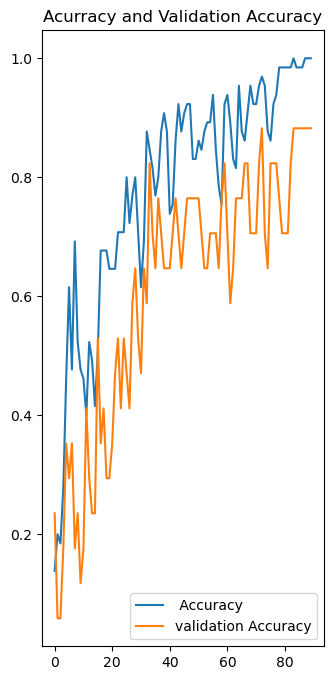

In [23]:
epochs_range=range(90)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label=' Accuracy')
plt.plot(epochs_range,val_acc,label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Acurracy and Validation Accuracy')

Text(0.5, 1.0, 'Acurracy and Validation loss')

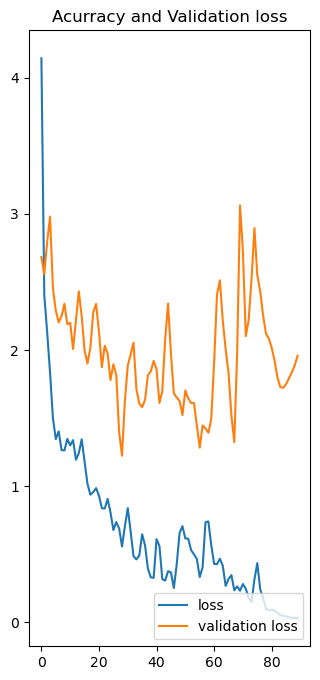

In [24]:
epochs_range=range(90)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='lower right')
plt.title('Acurracy and Validation loss')